In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Airline Data

In [85]:
data= pd.read_excel("Airlines+Data.xlsx", index_col=0, parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# EDA

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [87]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [88]:
data.isnull().sum()

Passengers    0
dtype: int64

# Data Visualization

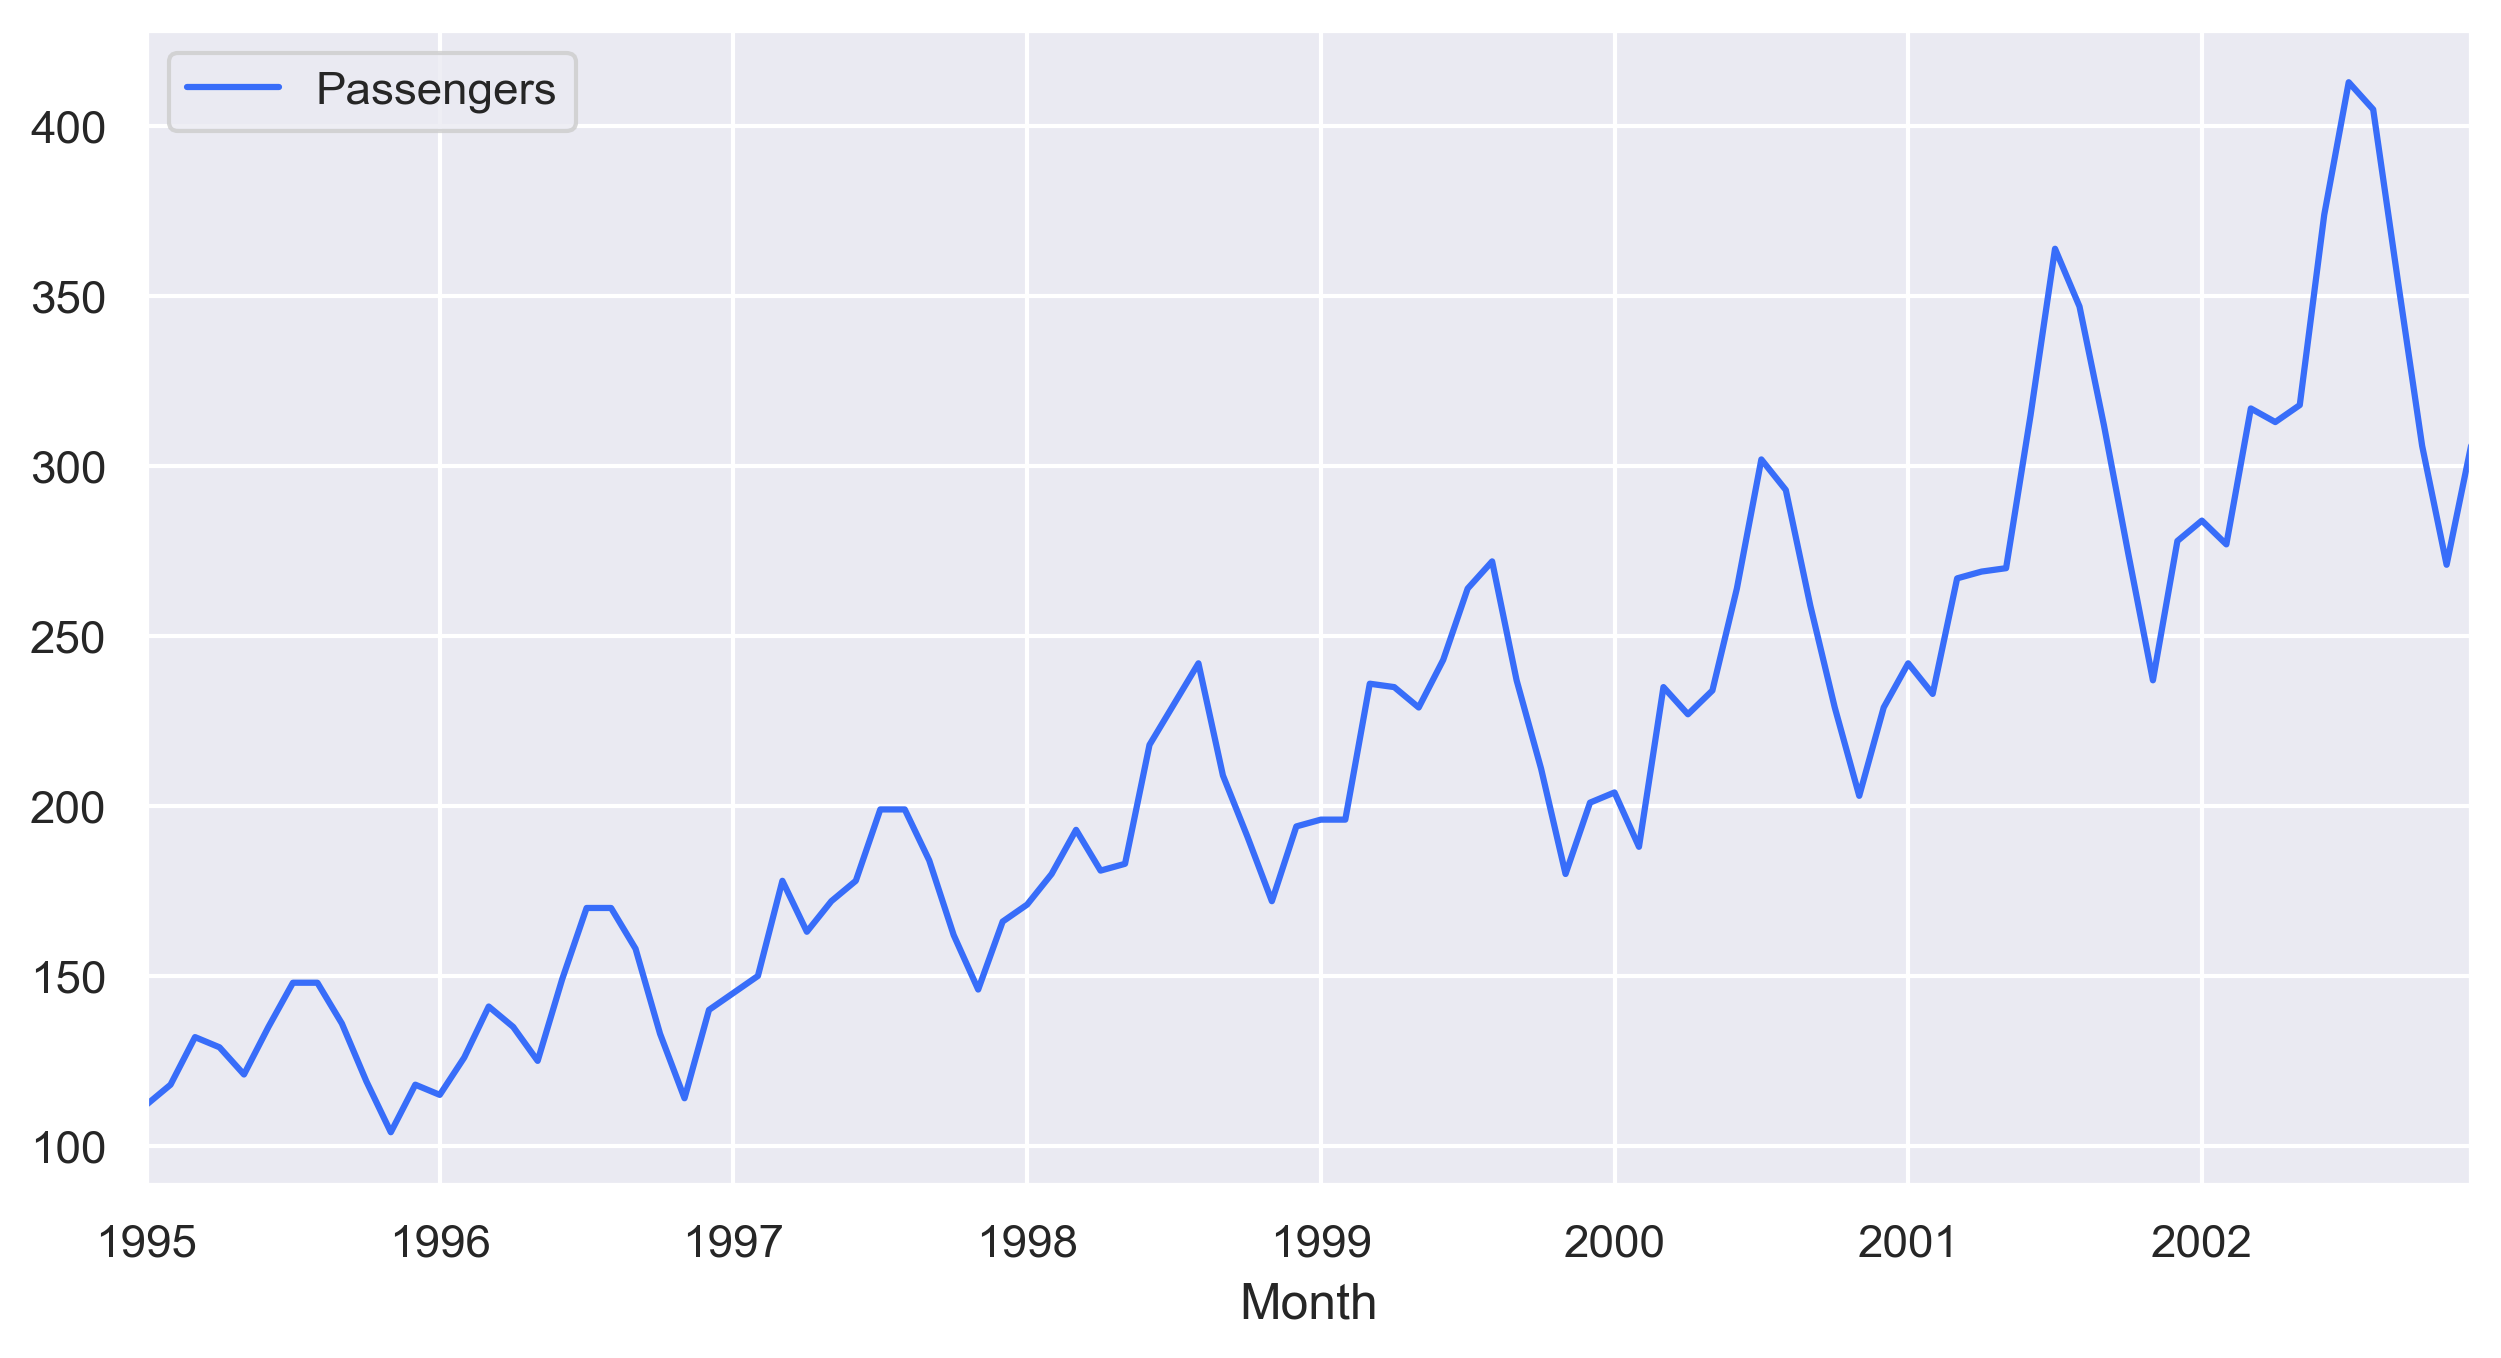

In [89]:
data.plot()
plt.show()

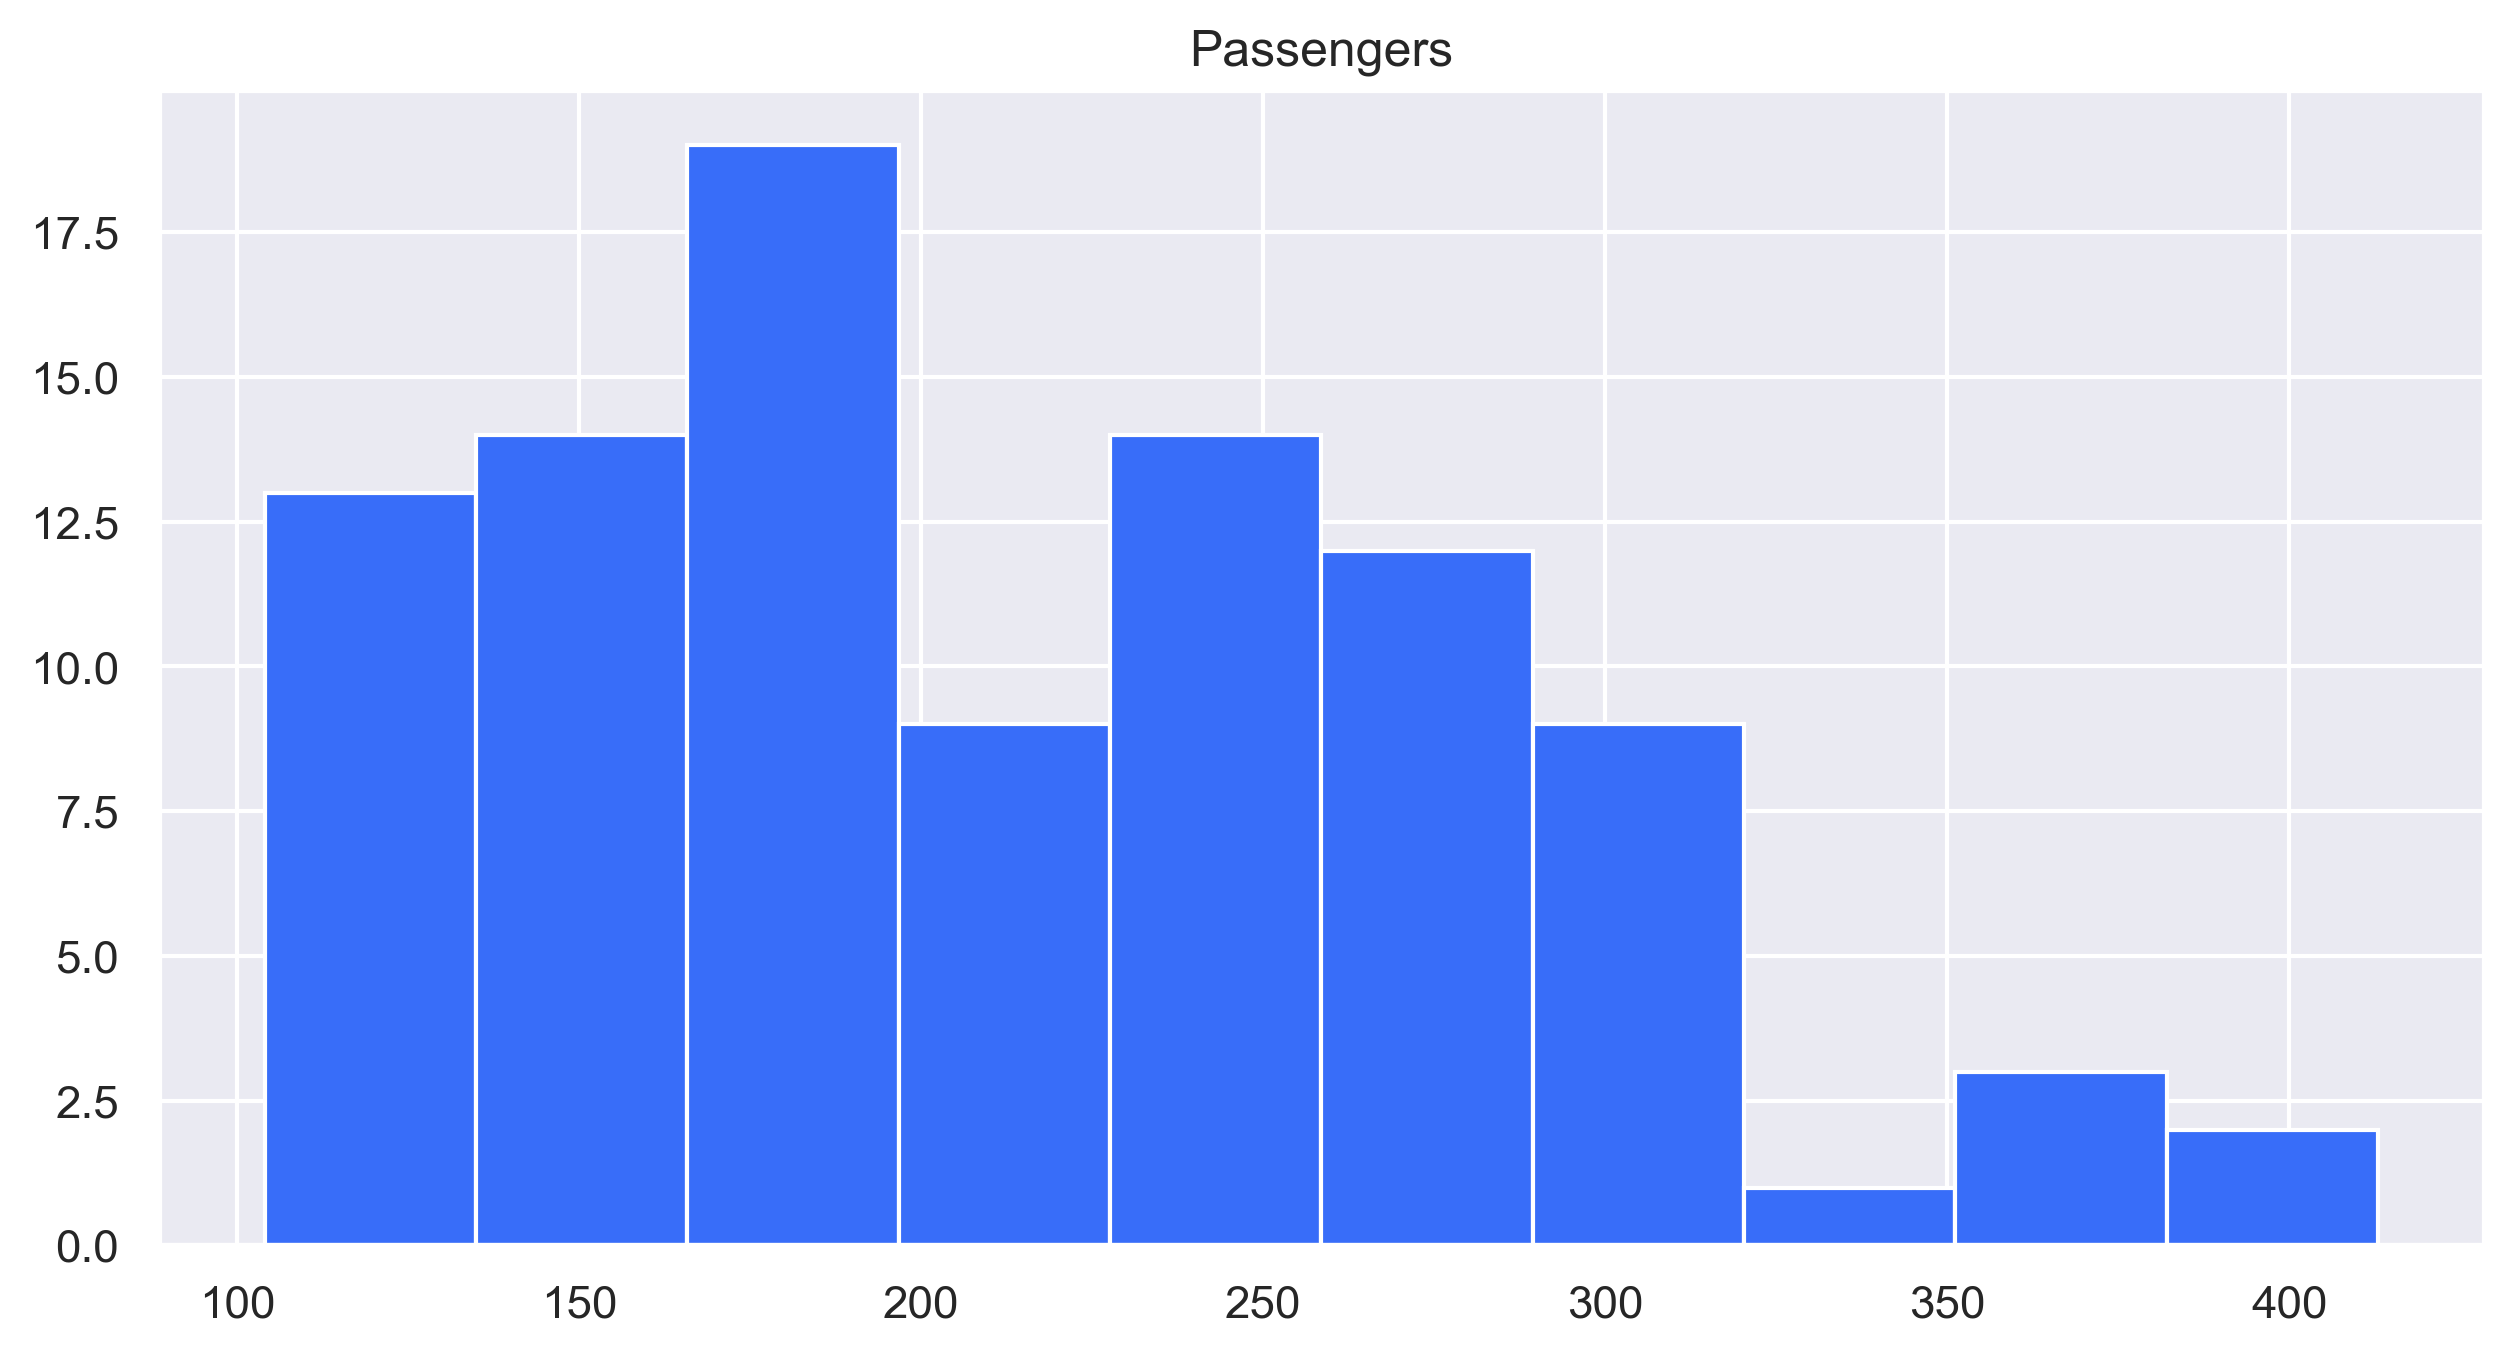

In [90]:
data.hist()
plt.show()

<Axes: ylabel='Density'>

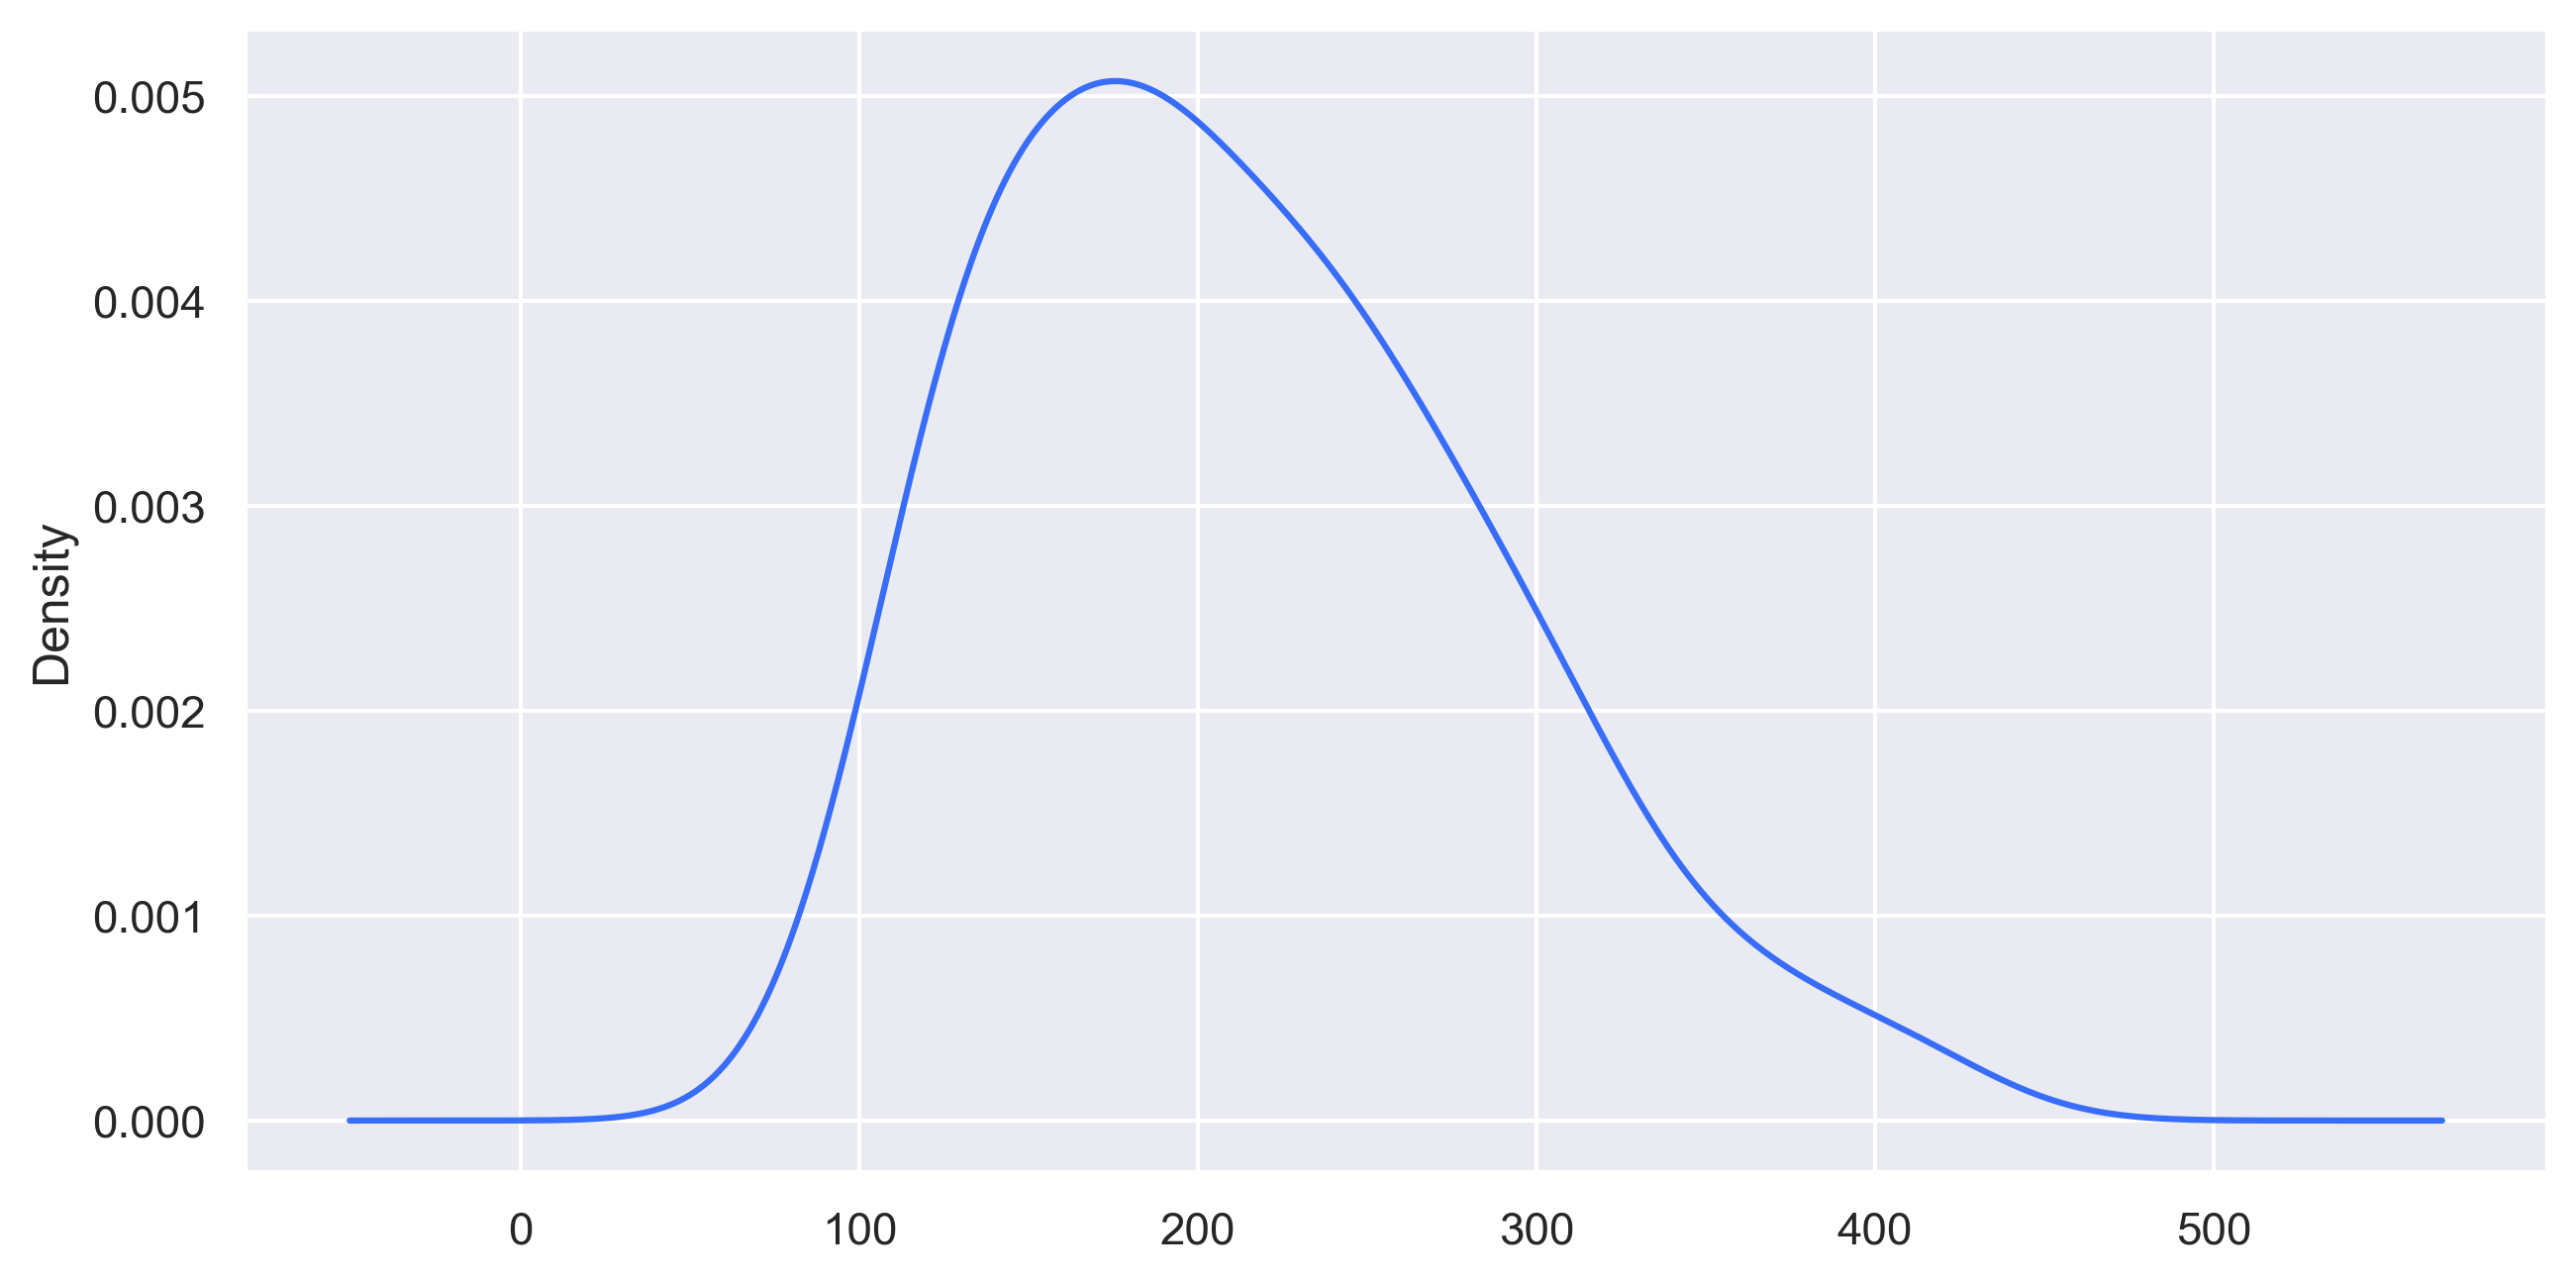

In [91]:
data.Passengers.plot(kind='kde')

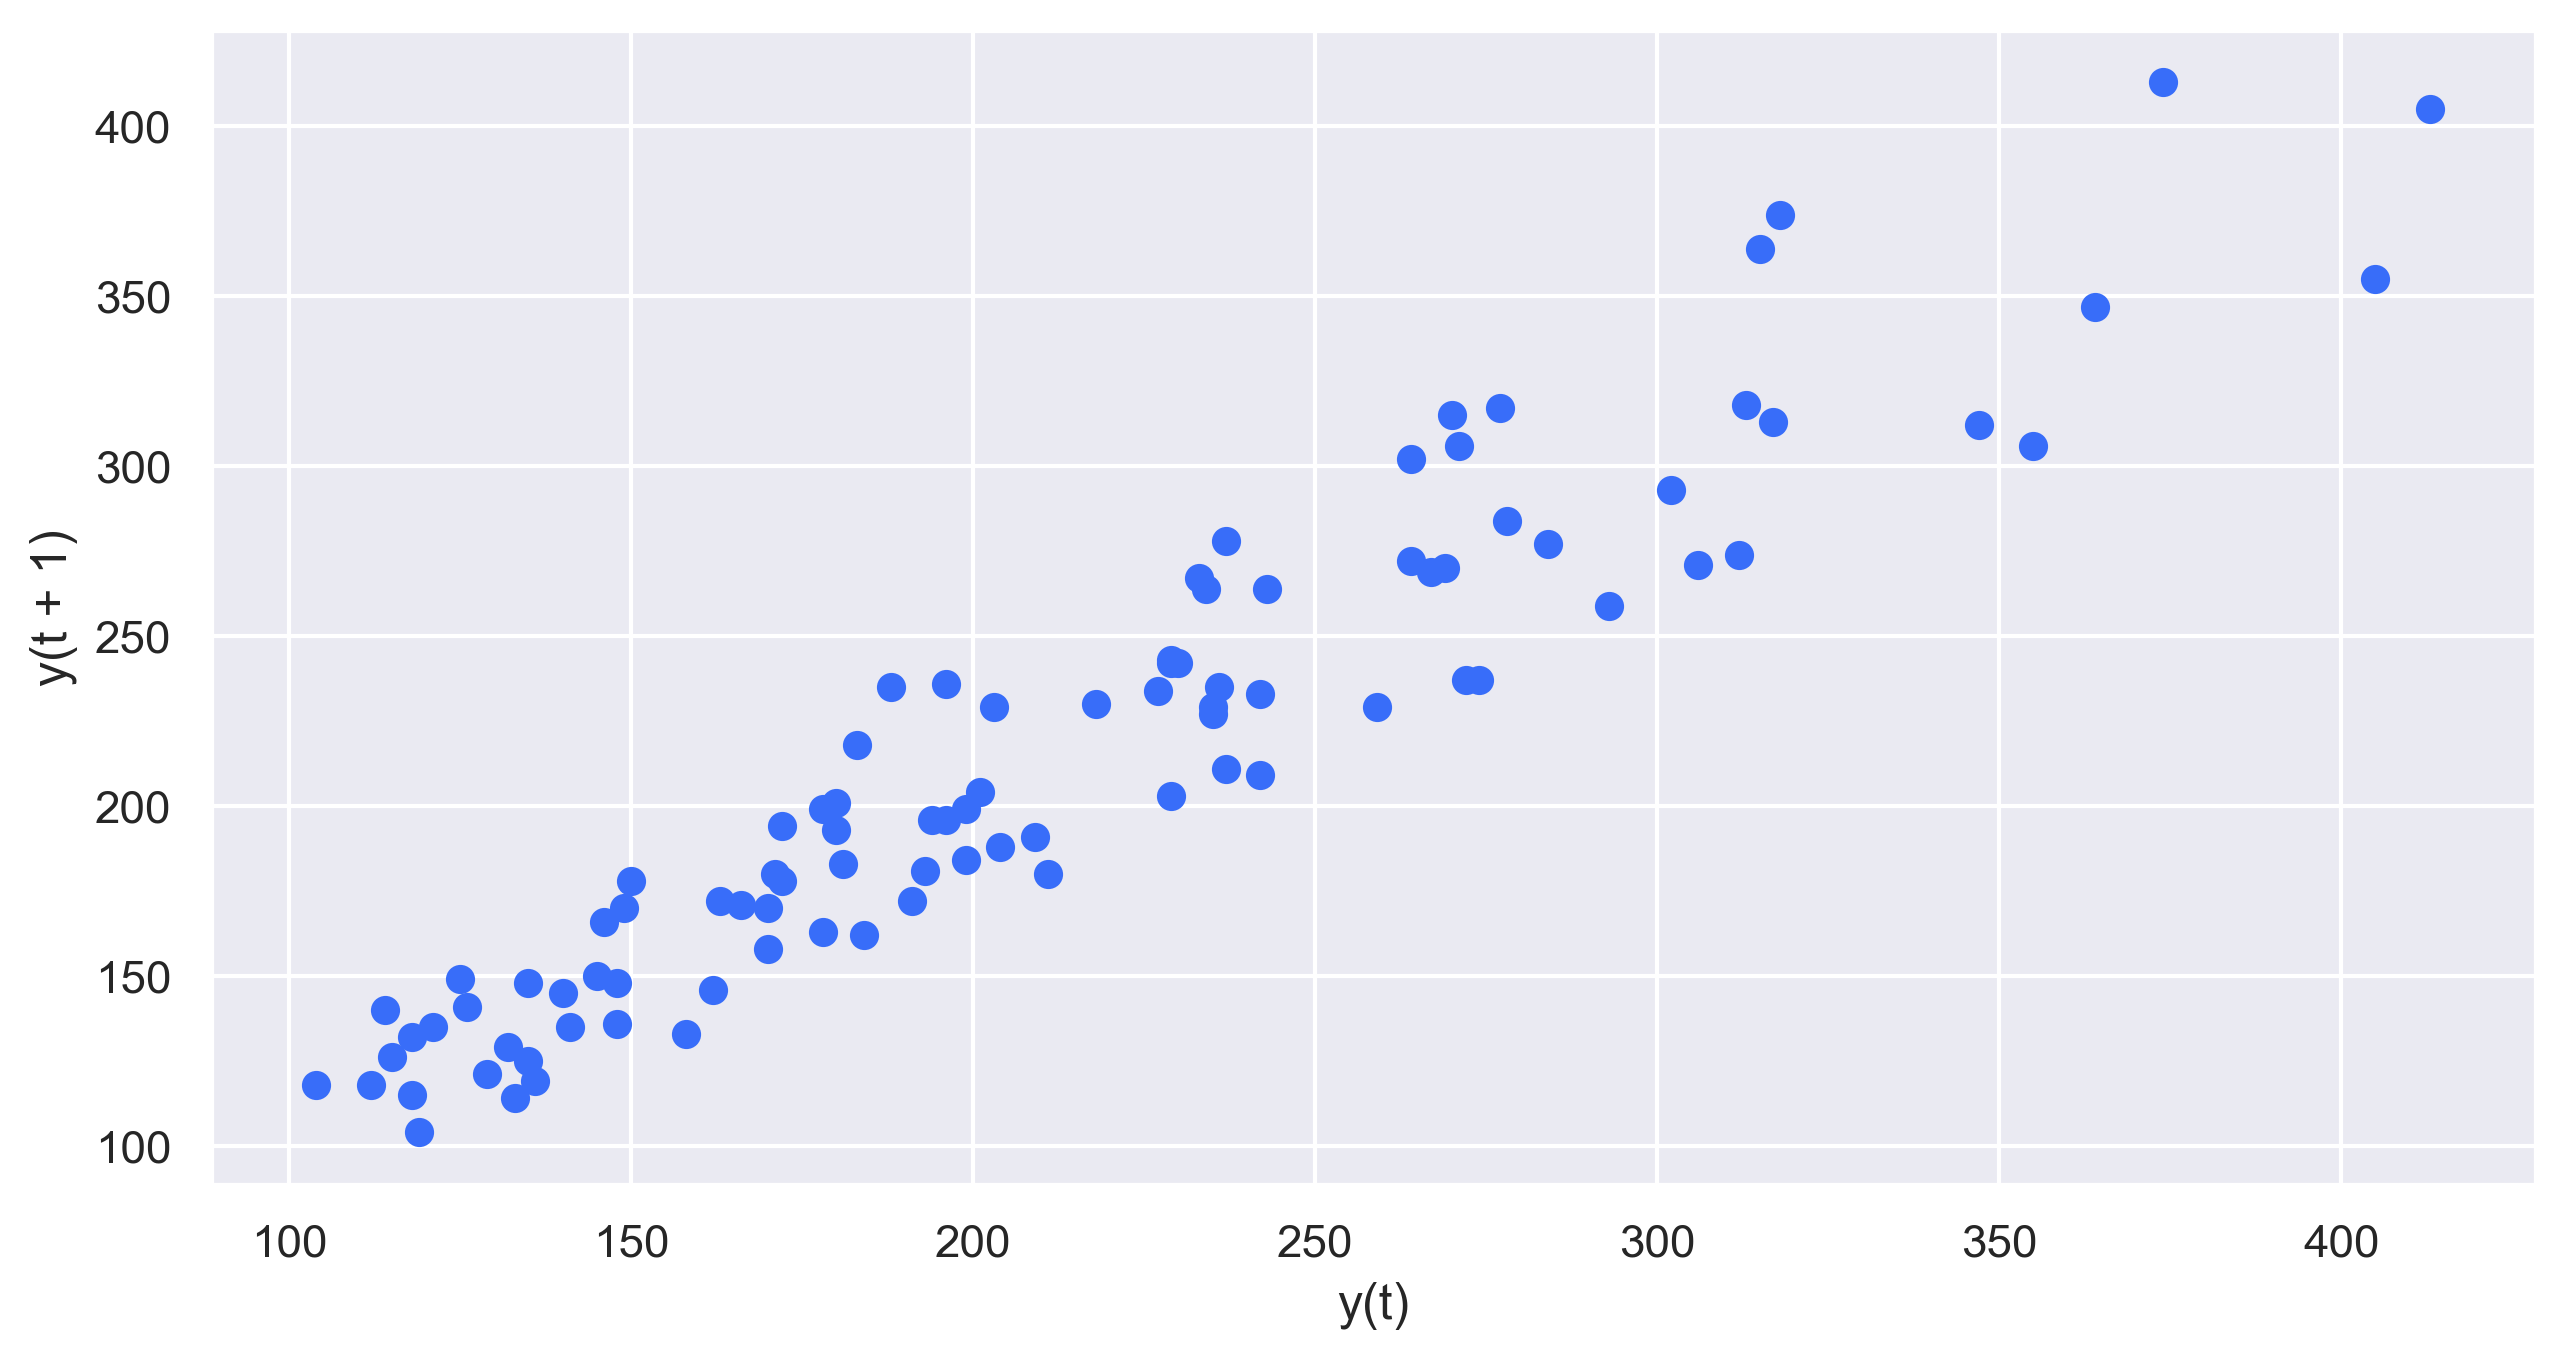

In [92]:
# create a scatter plot

from pandas.plotting import lag_plot

lag_plot(data)
plt.show()

# Square root transformation 

In [93]:
from numpy import sqrt
data1=sqrt(data["Passengers"])
data1

Month
1995-01-01    10.583005
1995-02-01    10.862780
1995-03-01    11.489125
1995-04-01    11.357817
1995-05-01    11.000000
                ...    
2002-08-01    20.124612
2002-09-01    18.841444
2002-10-01    17.492856
2002-11-01    16.462078
2002-12-01    17.492856
Name: Passengers, Length: 96, dtype: float64

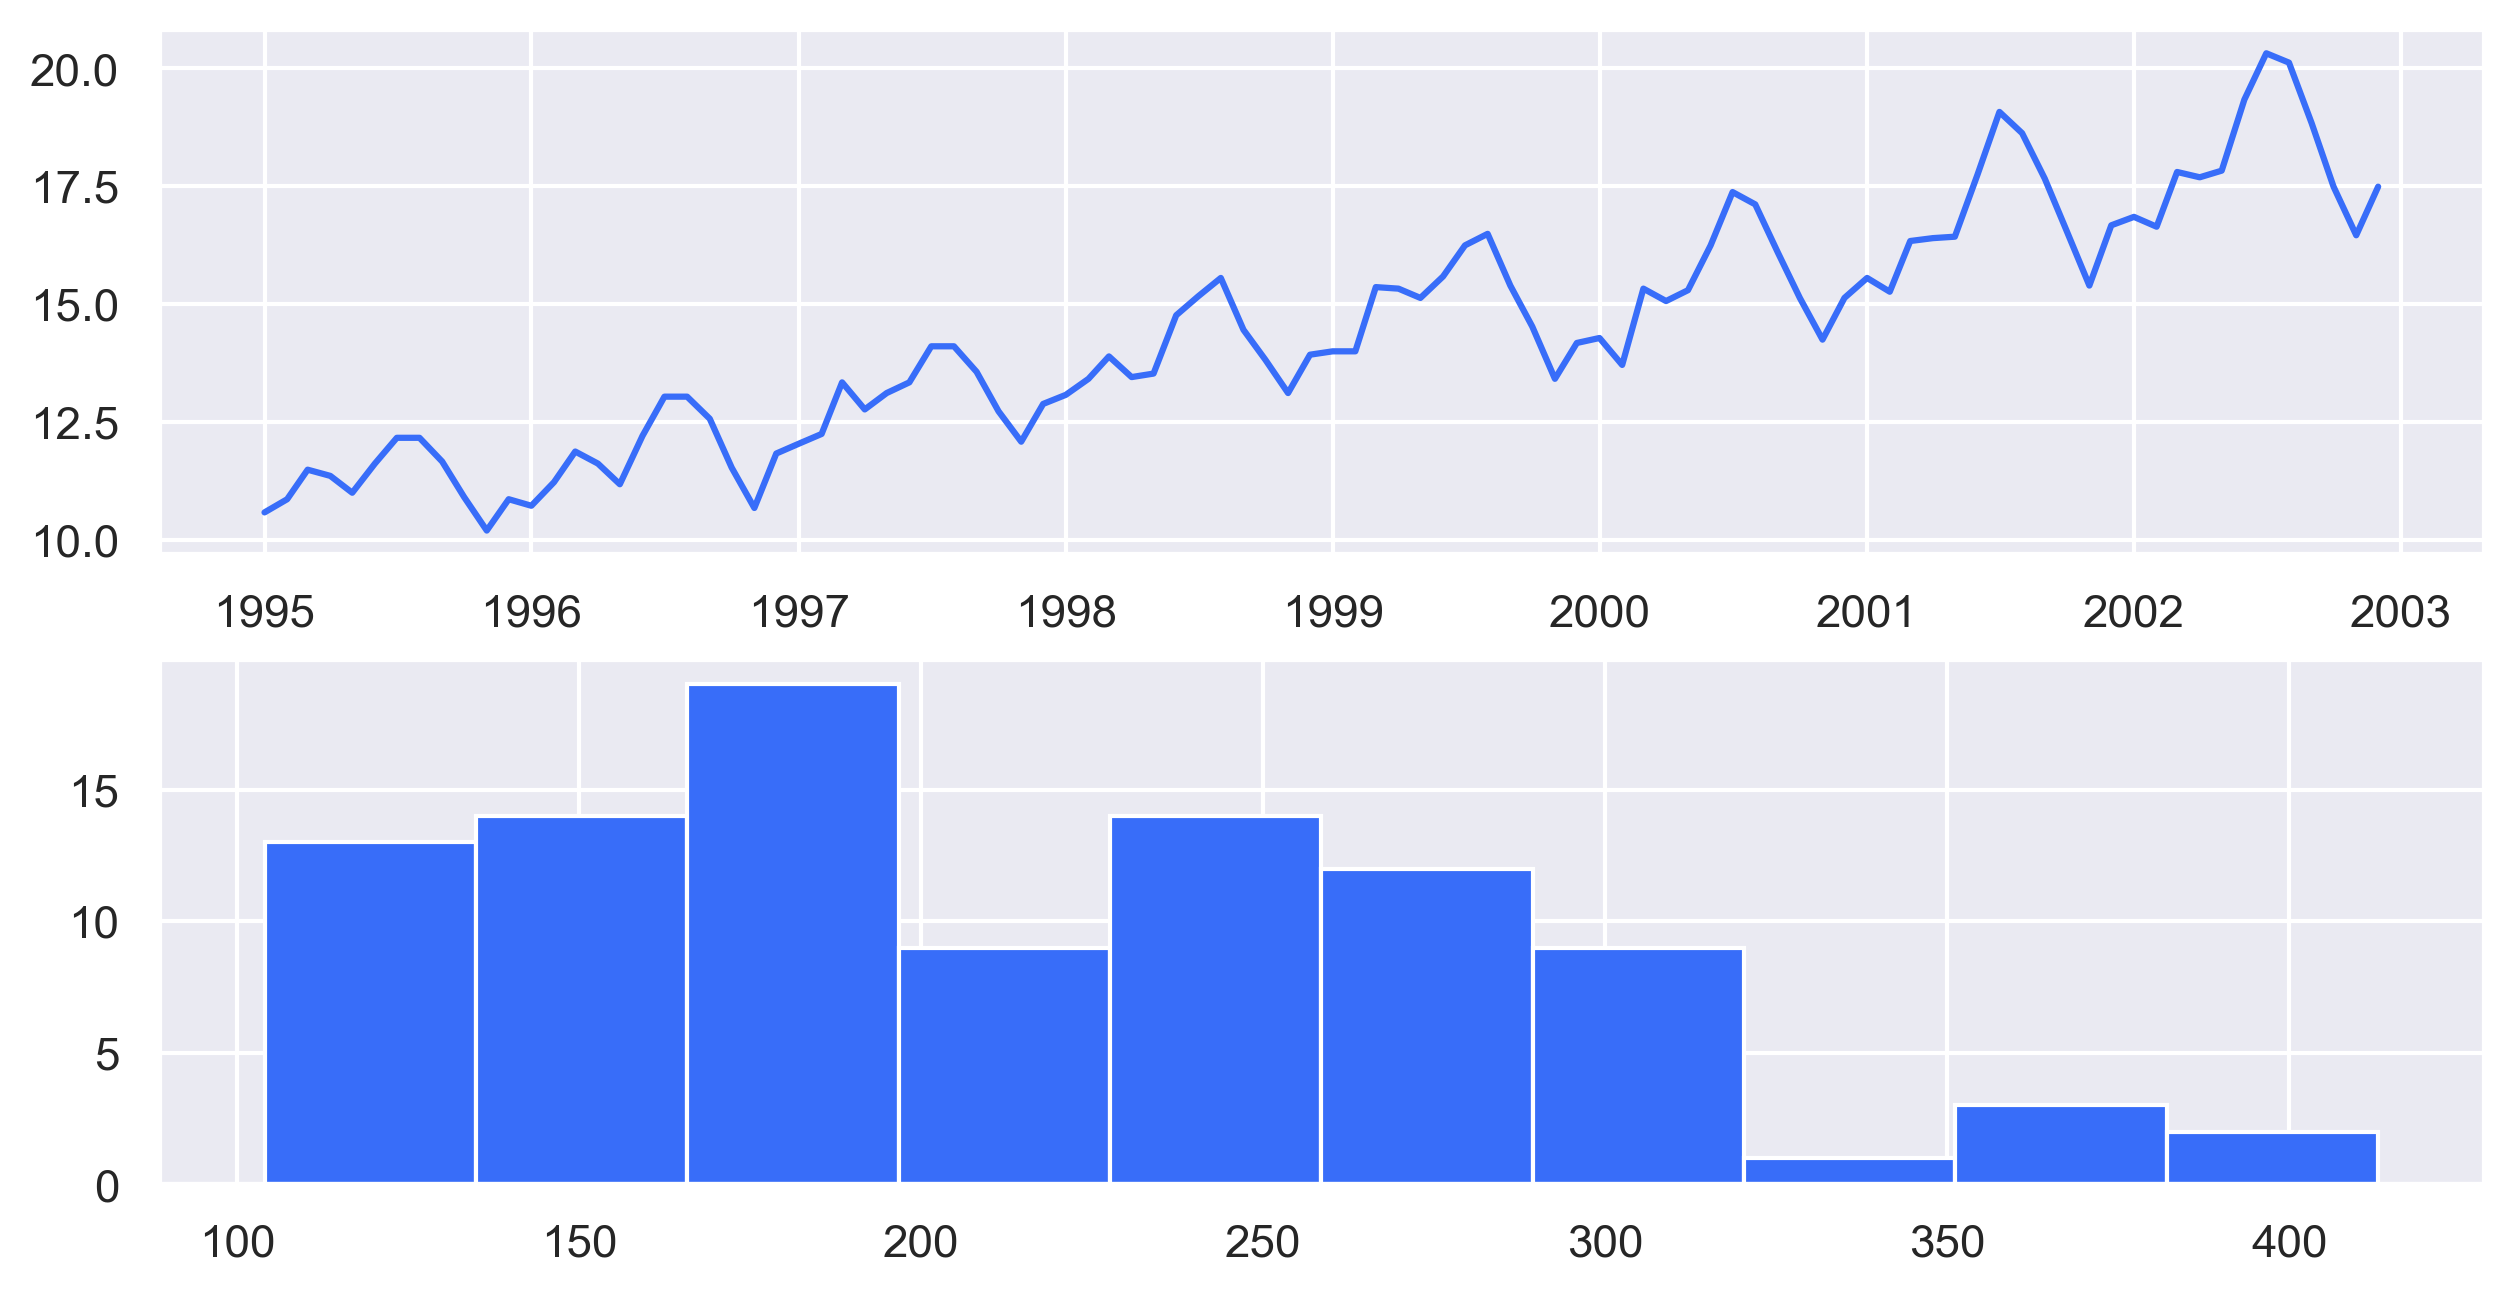

In [94]:
# lineplot for square-root transformation

plt.subplot(211)
plt.plot(data1)
plt.subplot(212)
plt.hist(data)
plt.show()

# Log transformation 


In [95]:
from numpy import log
data2=log(data["Passengers"])
data2

Month
1995-01-01    4.718499
1995-02-01    4.770685
1995-03-01    4.882802
1995-04-01    4.859812
1995-05-01    4.795791
                ...   
2002-08-01    6.003887
2002-09-01    5.872118
2002-10-01    5.723585
2002-11-01    5.602119
2002-12-01    5.723585
Name: Passengers, Length: 96, dtype: float64

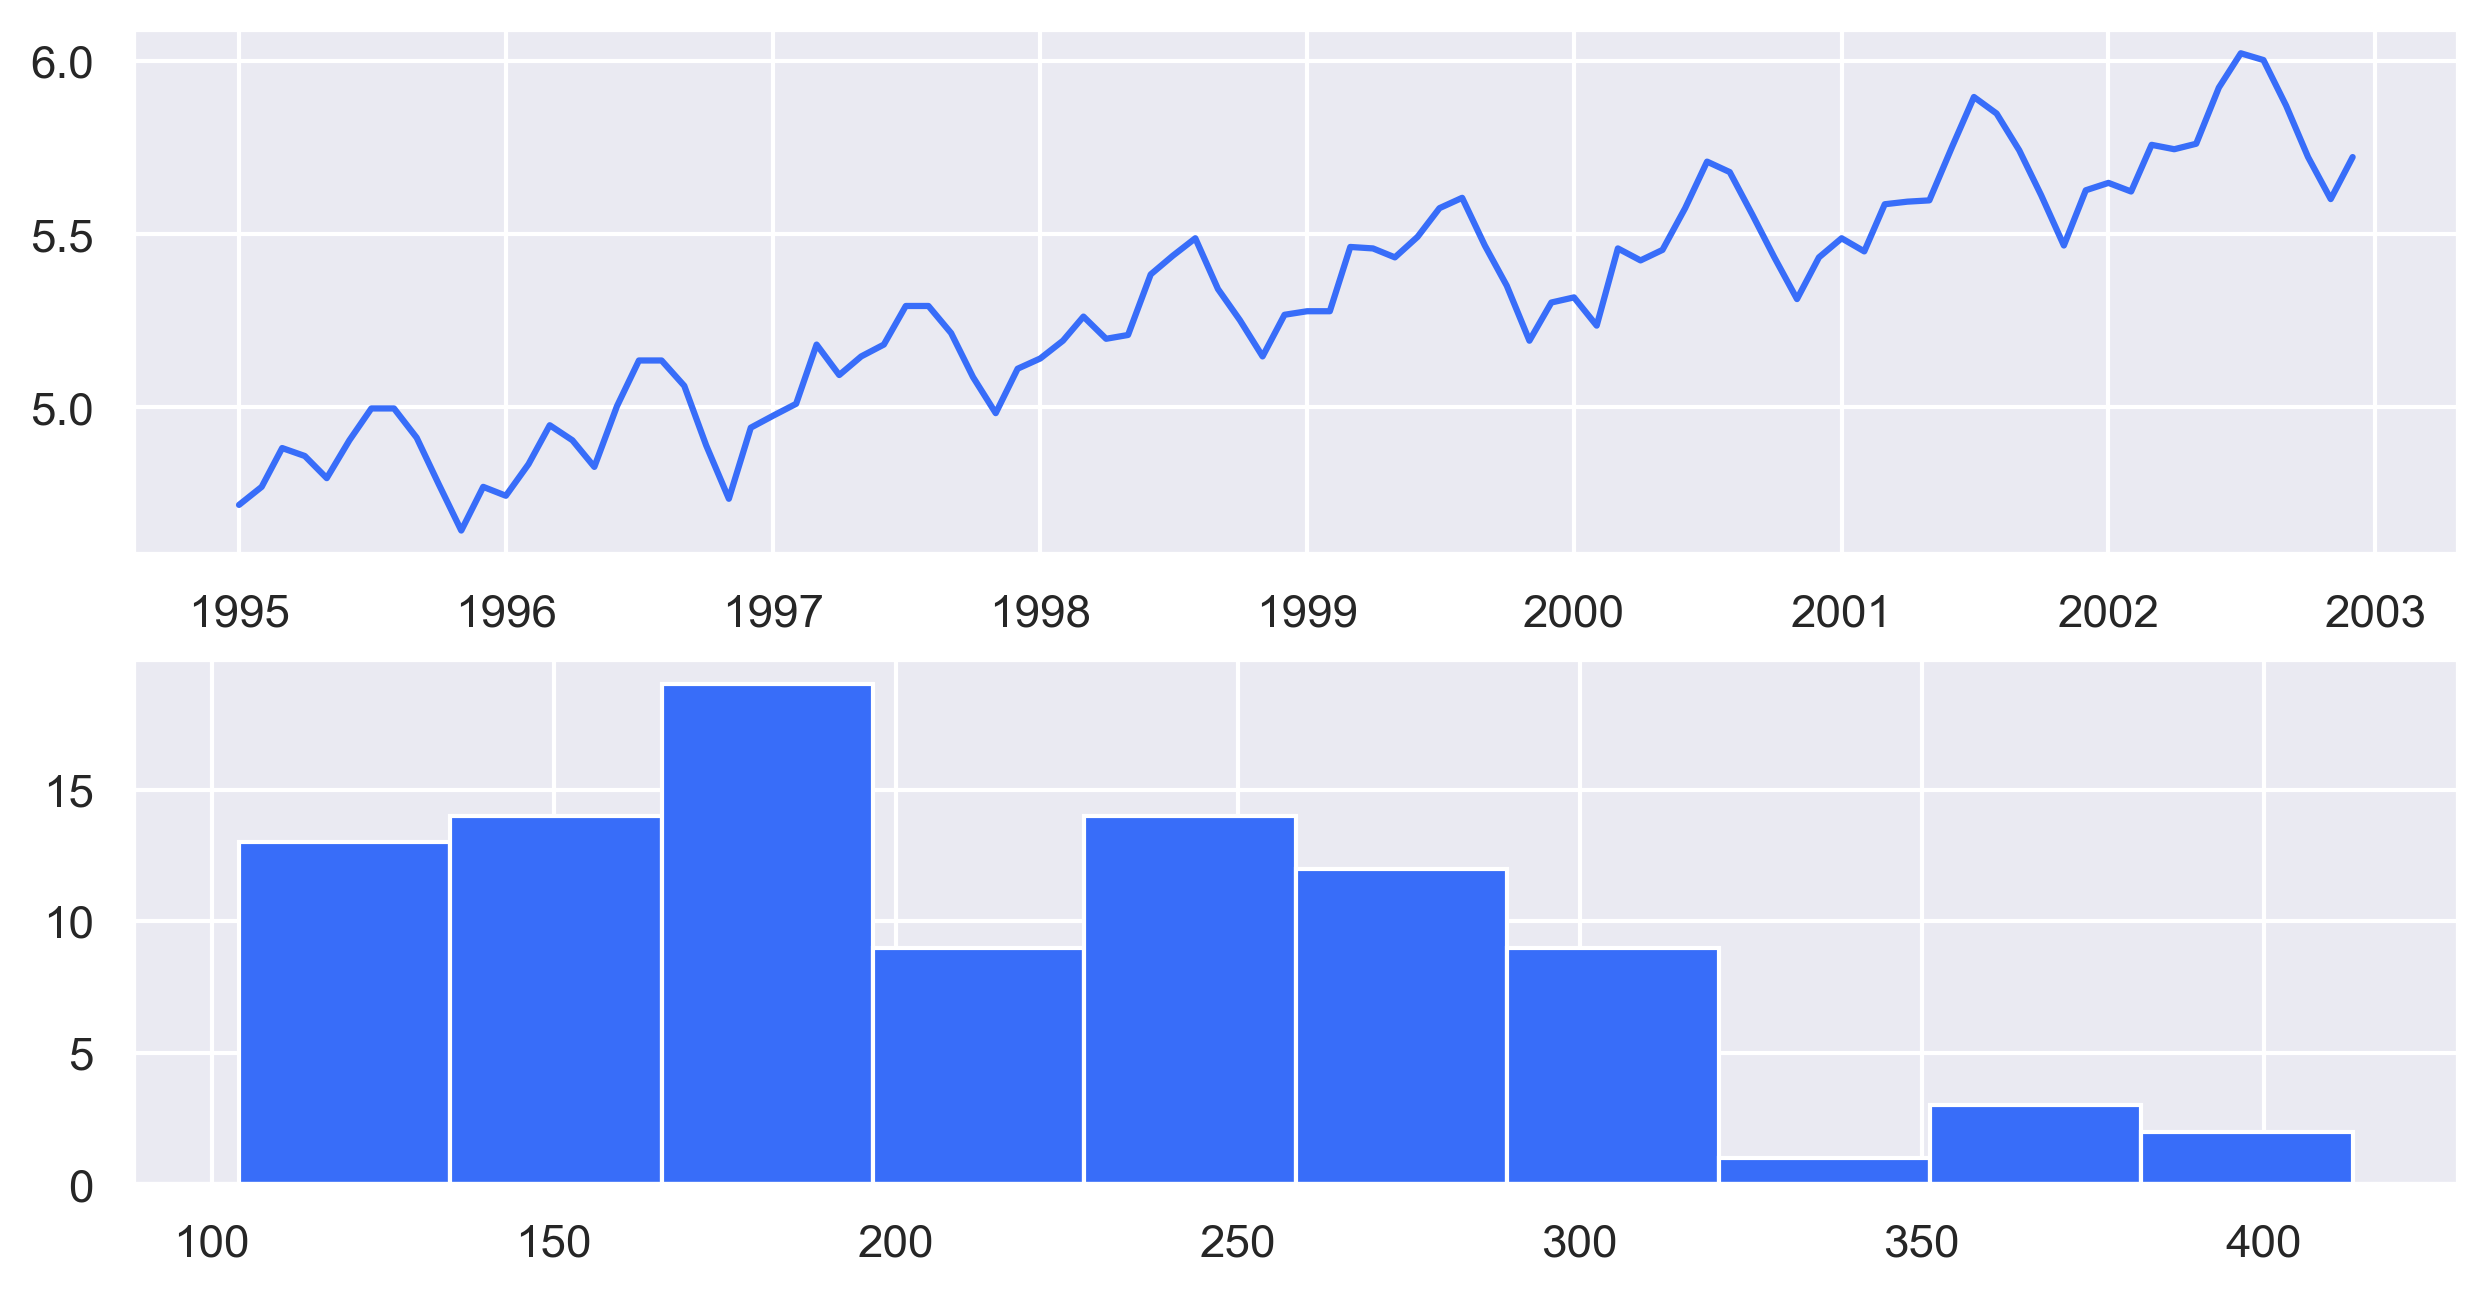

In [96]:
# line plot and hist plot for log transformation
plt.subplot(211)
plt.plot(data2)
plt.subplot(212)
plt.hist(data)
plt.show()

# Creating t, tsquare and log values


In [97]:
data["t"]=np.arange(1,97)
data["t-Square"]= data['t']**2
data['log_pass']=np.log(data['Passengers'])
data

,Passengers,t,t-Square,log_pass
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


In [98]:
# Splitting Data
train=data.head(84)
test=data.tail(12)

In [99]:
train

,Passengers,t,t-Square,log_pass
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2001-08-01,347,80,6400,5.849325
2001-09-01,312,81,6561,5.743003
2001-10-01,274,82,6724,5.613128


In [100]:
test

,Passengers,t,t-Square,log_pass
Month,,,,
2002-01-01,284,85,7225,5.648974
2002-02-01,277,86,7396,5.624018
2002-03-01,317,87,7569,5.758902
2002-04-01,313,88,7744,5.746203
2002-05-01,318,89,7921,5.762051
2002-06-01,374,90,8100,5.924256
2002-07-01,413,91,8281,6.023448
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118


# Model Creation 


In [101]:
import statsmodels.formula.api as smf

In [103]:
from sklearn.metrics import mean_squared_error

# Linear model 


In [104]:
mod_linear=smf.ols("Passengers~t", data=train).fit()
pred_linear=pd.Series(mod_linear.predict(pd.DataFrame(test["t"])))
rmse_linear=np.sqrt(mean_squared_error(test["Passengers"], pred_linear))
rmse_linear

53.199236534802715

# Exponential Model


In [105]:
mod_exp=smf.ols("log_pass~t", data=train).fit()
pred_exp=pd.Series(mod_exp.predict(pd.DataFrame(test["t"])))
rmse_exp=np.sqrt(mean_squared_error(test['Passengers'], pred_exp))
rmse_exp

325.7150613551535

# Quadratic Model


In [106]:
Quad=smf.ols("t-Square~t+t-Squre", data=train).fit()
pred_quad=pd.Series(Quad.predict(pd.DataFrame(test[['t','t-Square']])))
rmse_quad=np.sqrt(mean_squared_error(test["Passengers"], pred_quad))
rmse_quad

242.04355668625706

# Smoothing Techniques


In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

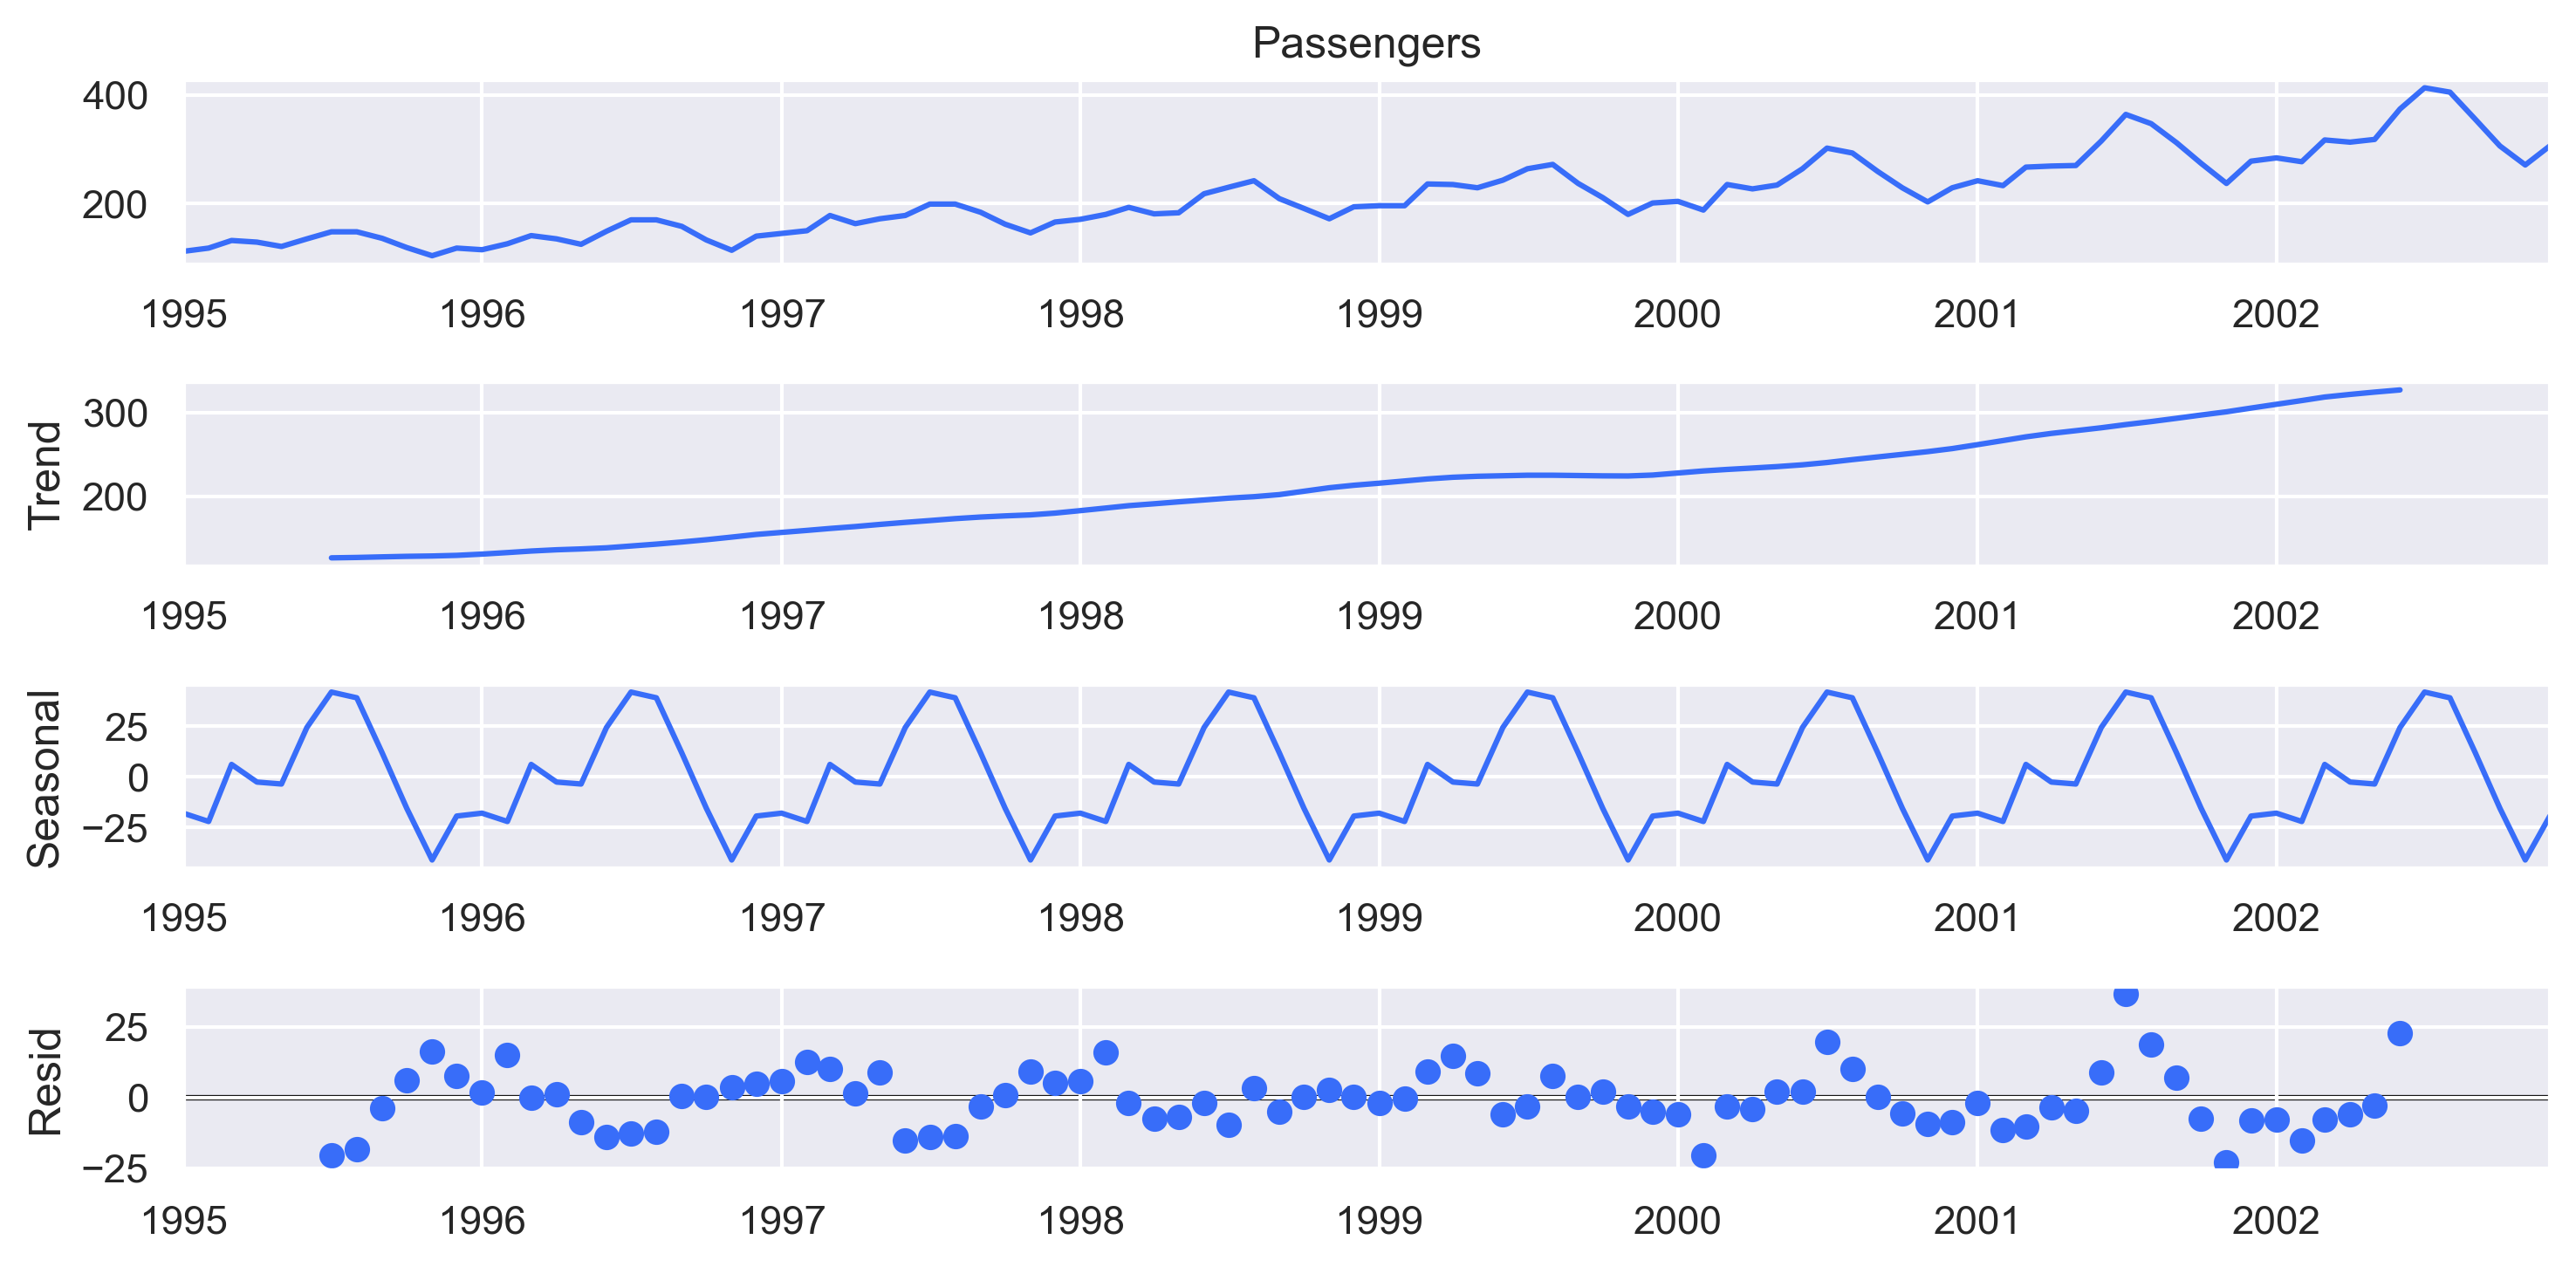

In [108]:
# Decomposition plot
dec=seasonal_decompose(data.Passengers,period=12)
dec.plot()
plt.show()

# Simple Exponential method 


In [109]:
ses=SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses= ses.predict(start=test.index[0],end=test.index[-1])
rmse_ses= np.sqrt(mean_squared_error(test["Passengers"], pred_ses))
rmse_ses

64.84476396990497

# holt Method


In [110]:
HM= Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_HM= HM.predict(start=test.index[0],end=test.index[-1])
rmse_HM= np.sqrt(mean_squared_error(test["Passengers"], pred_HM))
rmse_HM

95.7667445267524

# Holts winter exponential smoothing with additive seasonality and additive trend


In [111]:
hmexp = ExponentialSmoothing(train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hmexp= hmexp.predict(start=test.index[0],end=test.index[-1])
rmse_hmexp= np.sqrt(mean_squared_error(test["Passengers"], pred_hmexp))
rmse_hmexp

29.604474237998442

# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [112]:
hlmm = ExponentialSmoothing(train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hlmm = hlmm.predict(start = test.index[0],end = test.index[-1])
rmse_hlmm= np.sqrt(mean_squared_error(test["Passengers"], pred_hlmm))
rmse_hlmm

12.921008951981054

In [113]:
df= {'Model': pd.Series(['Linear','exponential','Quadratic','Simple Exponential','Holt','Holt Winter add','Holt Winter Multiplication'] ), 
     "RMSE_Values" : pd.Series([rmse_linear, rmse_exp, rmse_quad, rmse_ses, rmse_HM, rmse_hmexp, rmse_hlmm])
}

In [114]:
table_rmse=pd.DataFrame(df)
table_rmse.sort_values(['RMSE_Values'])

,Model,RMSE_Values
6,Holt Winter Multiplication,12.921009
5,Holt Winter add,29.604474
0,Linear,53.199237
3,Simple Exponential,64.844764
4,Holt,95.766745
2,Quadratic,242.043557
1,exponential,325.715061


''' - From decomposition Plot ,  We conclude that we accept Holt Winter Add model because Seasonality is Additive.'''

# Final Model


In [115]:
final_model=ExponentialSmoothing(data['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()

In [116]:
final_model.forecast(12)

2003-01-01    319.235250
2003-02-01    311.528363
2003-03-01    350.278666
2003-04-01    346.984953
2003-05-01    351.844997
2003-06-01    403.925669
2003-07-01    440.566746
2003-08-01    427.446408
2003-09-01    376.628091
2003-10-01    329.767424
2003-11-01    296.561195
2003-12-01    341.114658
Freq: MS, dtype: float64

# Coca Cola Data

In [117]:
coke= pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

In [118]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [119]:
coke.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [120]:
coke.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [121]:
coke.shape

(42, 2)

# Extract values from Quarter Column.


In [122]:
coke['Quarters'] = 0
coke['Year'] = 0
for i in range(42):
    r = coke["Quarter"][i]
    coke['Quarters'][i]= r[0:2]
    coke['Year'][i]= r[3:5]

In [123]:
coke

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87
5,Q2_87,2104.411995,Q2,87
6,Q3_87,2014.362999,Q3,87
7,Q4_87,1991.746998,Q4,87
8,Q1_88,1869.049999,Q1,88
9,Q2_88,2313.631996,Q2,88


In [124]:
coke1= pd.DataFrame(pd.get_dummies(coke['Quarters']))
coke1

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [125]:
coke1=pd.concat([coke,coke1],axis=1)
coke1

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0
5,Q2_87,2104.411995,Q2,87,0,1,0,0
6,Q3_87,2014.362999,Q3,87,0,0,1,0
7,Q4_87,1991.746998,Q4,87,0,0,0,1
8,Q1_88,1869.049999,Q1,88,1,0,0,0
9,Q2_88,2313.631996,Q2,88,0,1,0,0


In [126]:
df=coke1.drop(['Quarters','Quarter','Year'],axis=1)
df.head()

,Sales,Q1,Q2,Q3,Q4
0,1734.827000,1,0,0,0
1,2244.960999,0,1,0,0
2,2533.804993,0,0,1,0
3,2154.962997,0,0,0,1
4,1547.818996,1,0,0,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
 1   Q1      42 non-null     uint8  
 2   Q2      42 non-null     uint8  
 3   Q3      42 non-null     uint8  
 4   Q4      42 non-null     uint8  
dtypes: float64(1), uint8(4)
memory usage: 636.0 bytes


# Data Visualization

<Axes: >

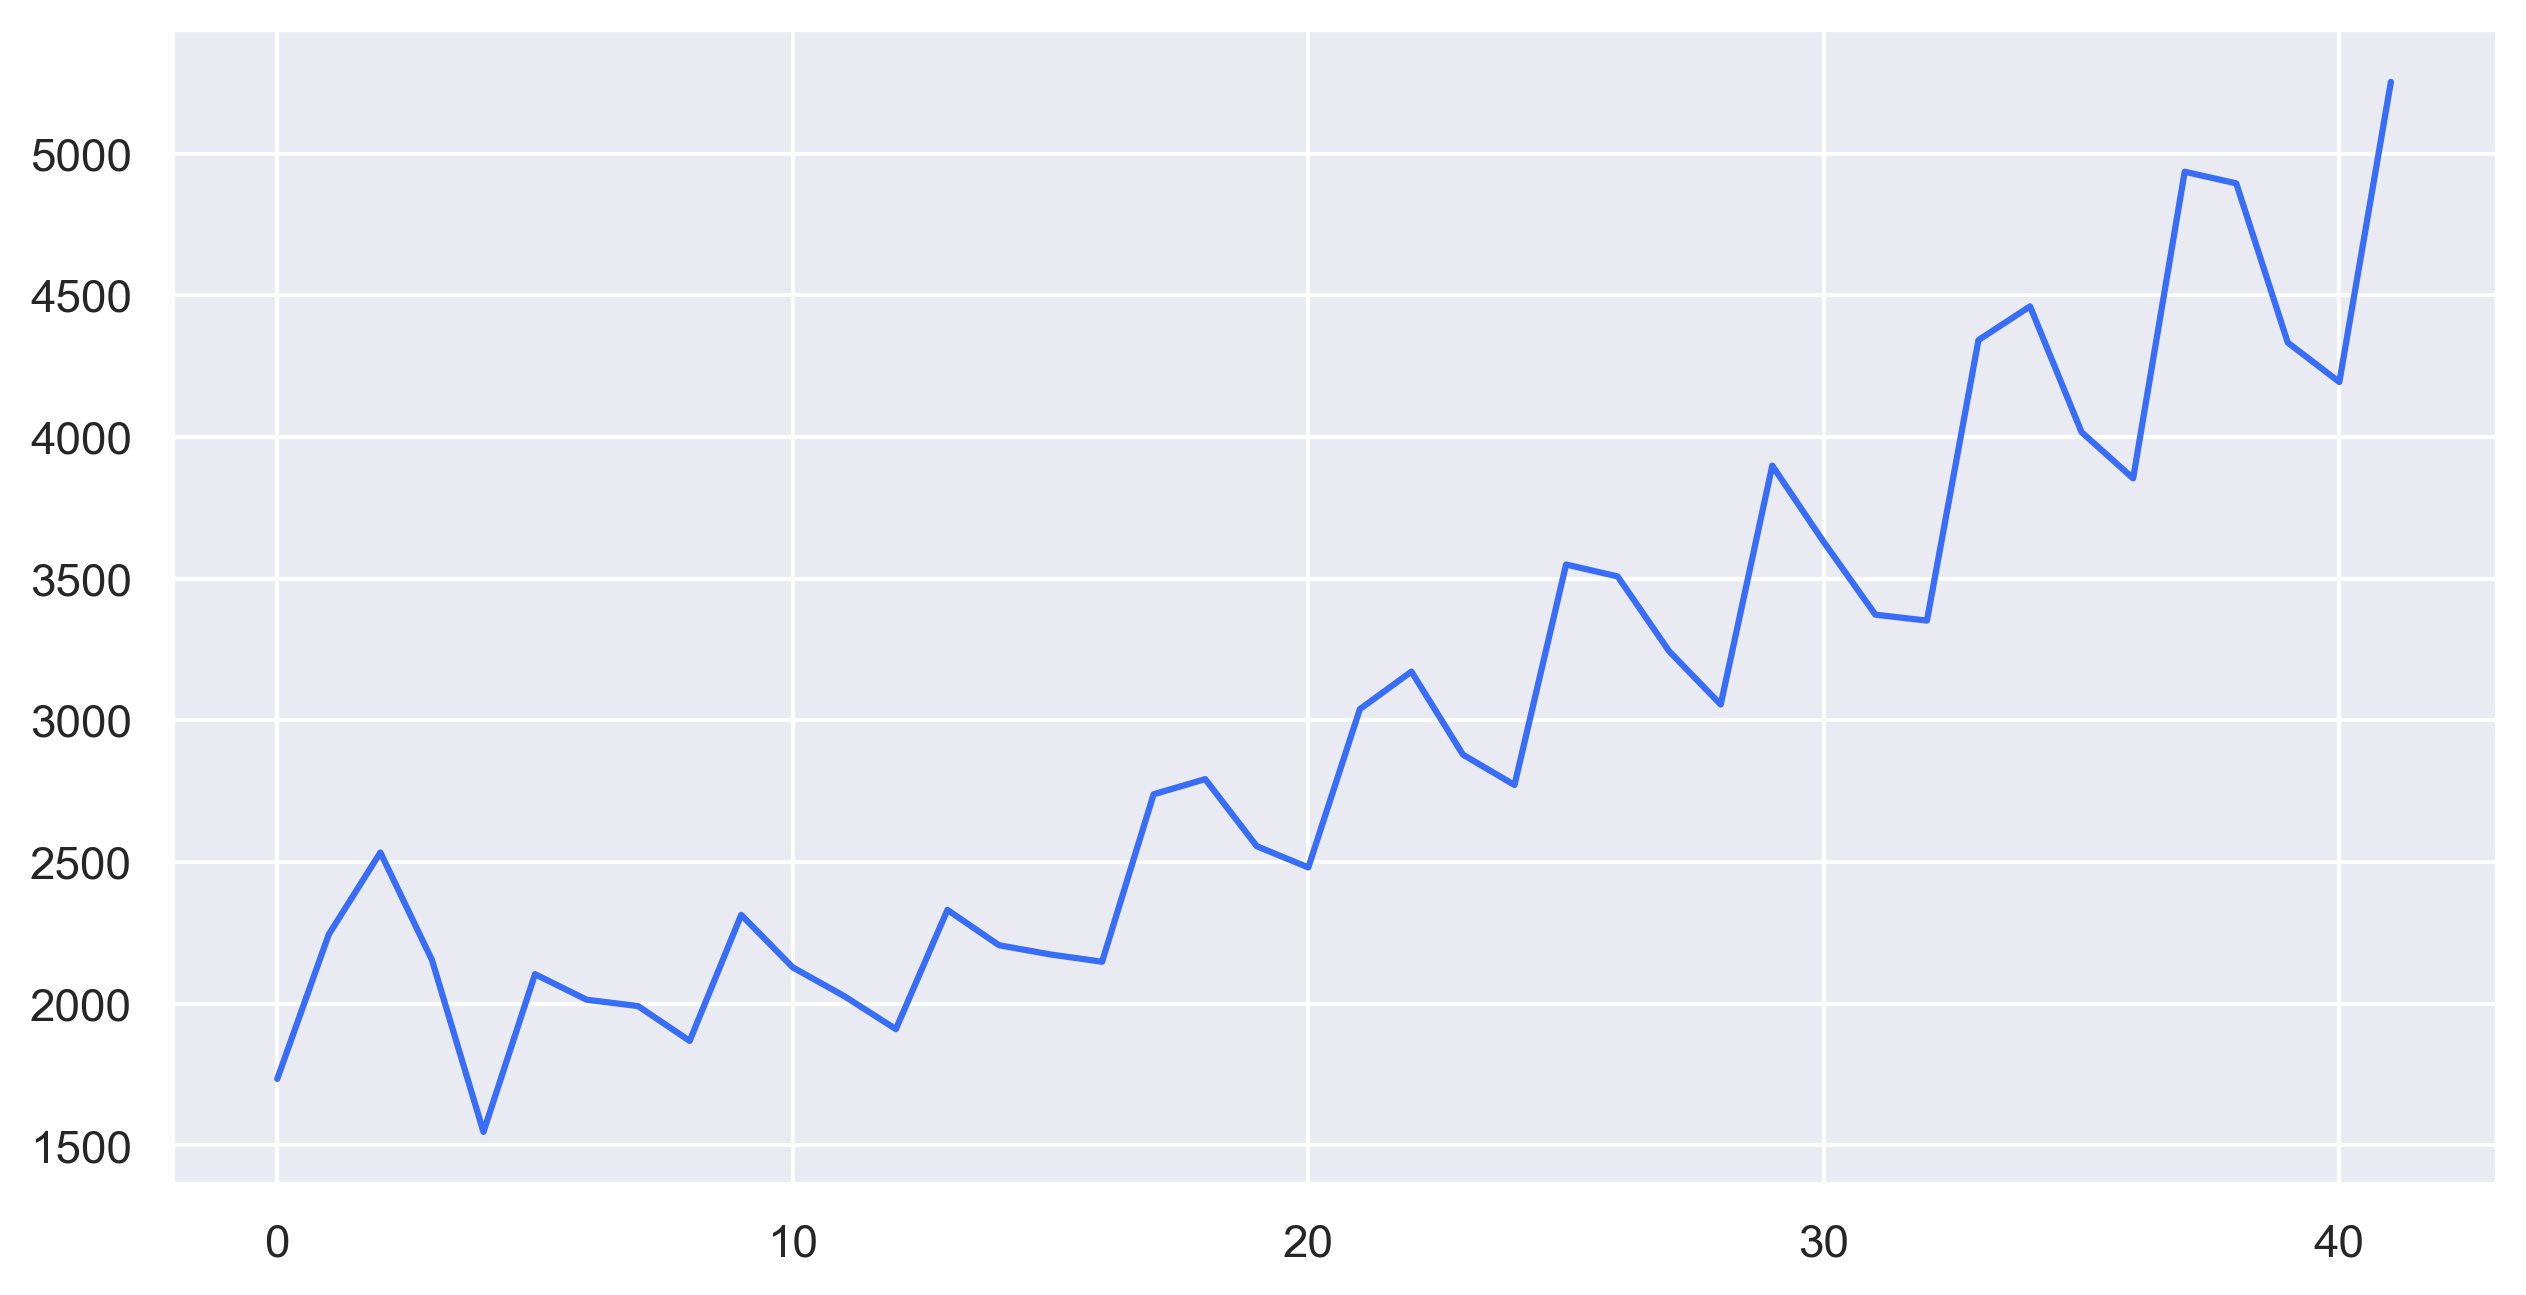

In [128]:
coke.Sales.plot()

<Axes: xlabel='Quarters', ylabel='Year'>

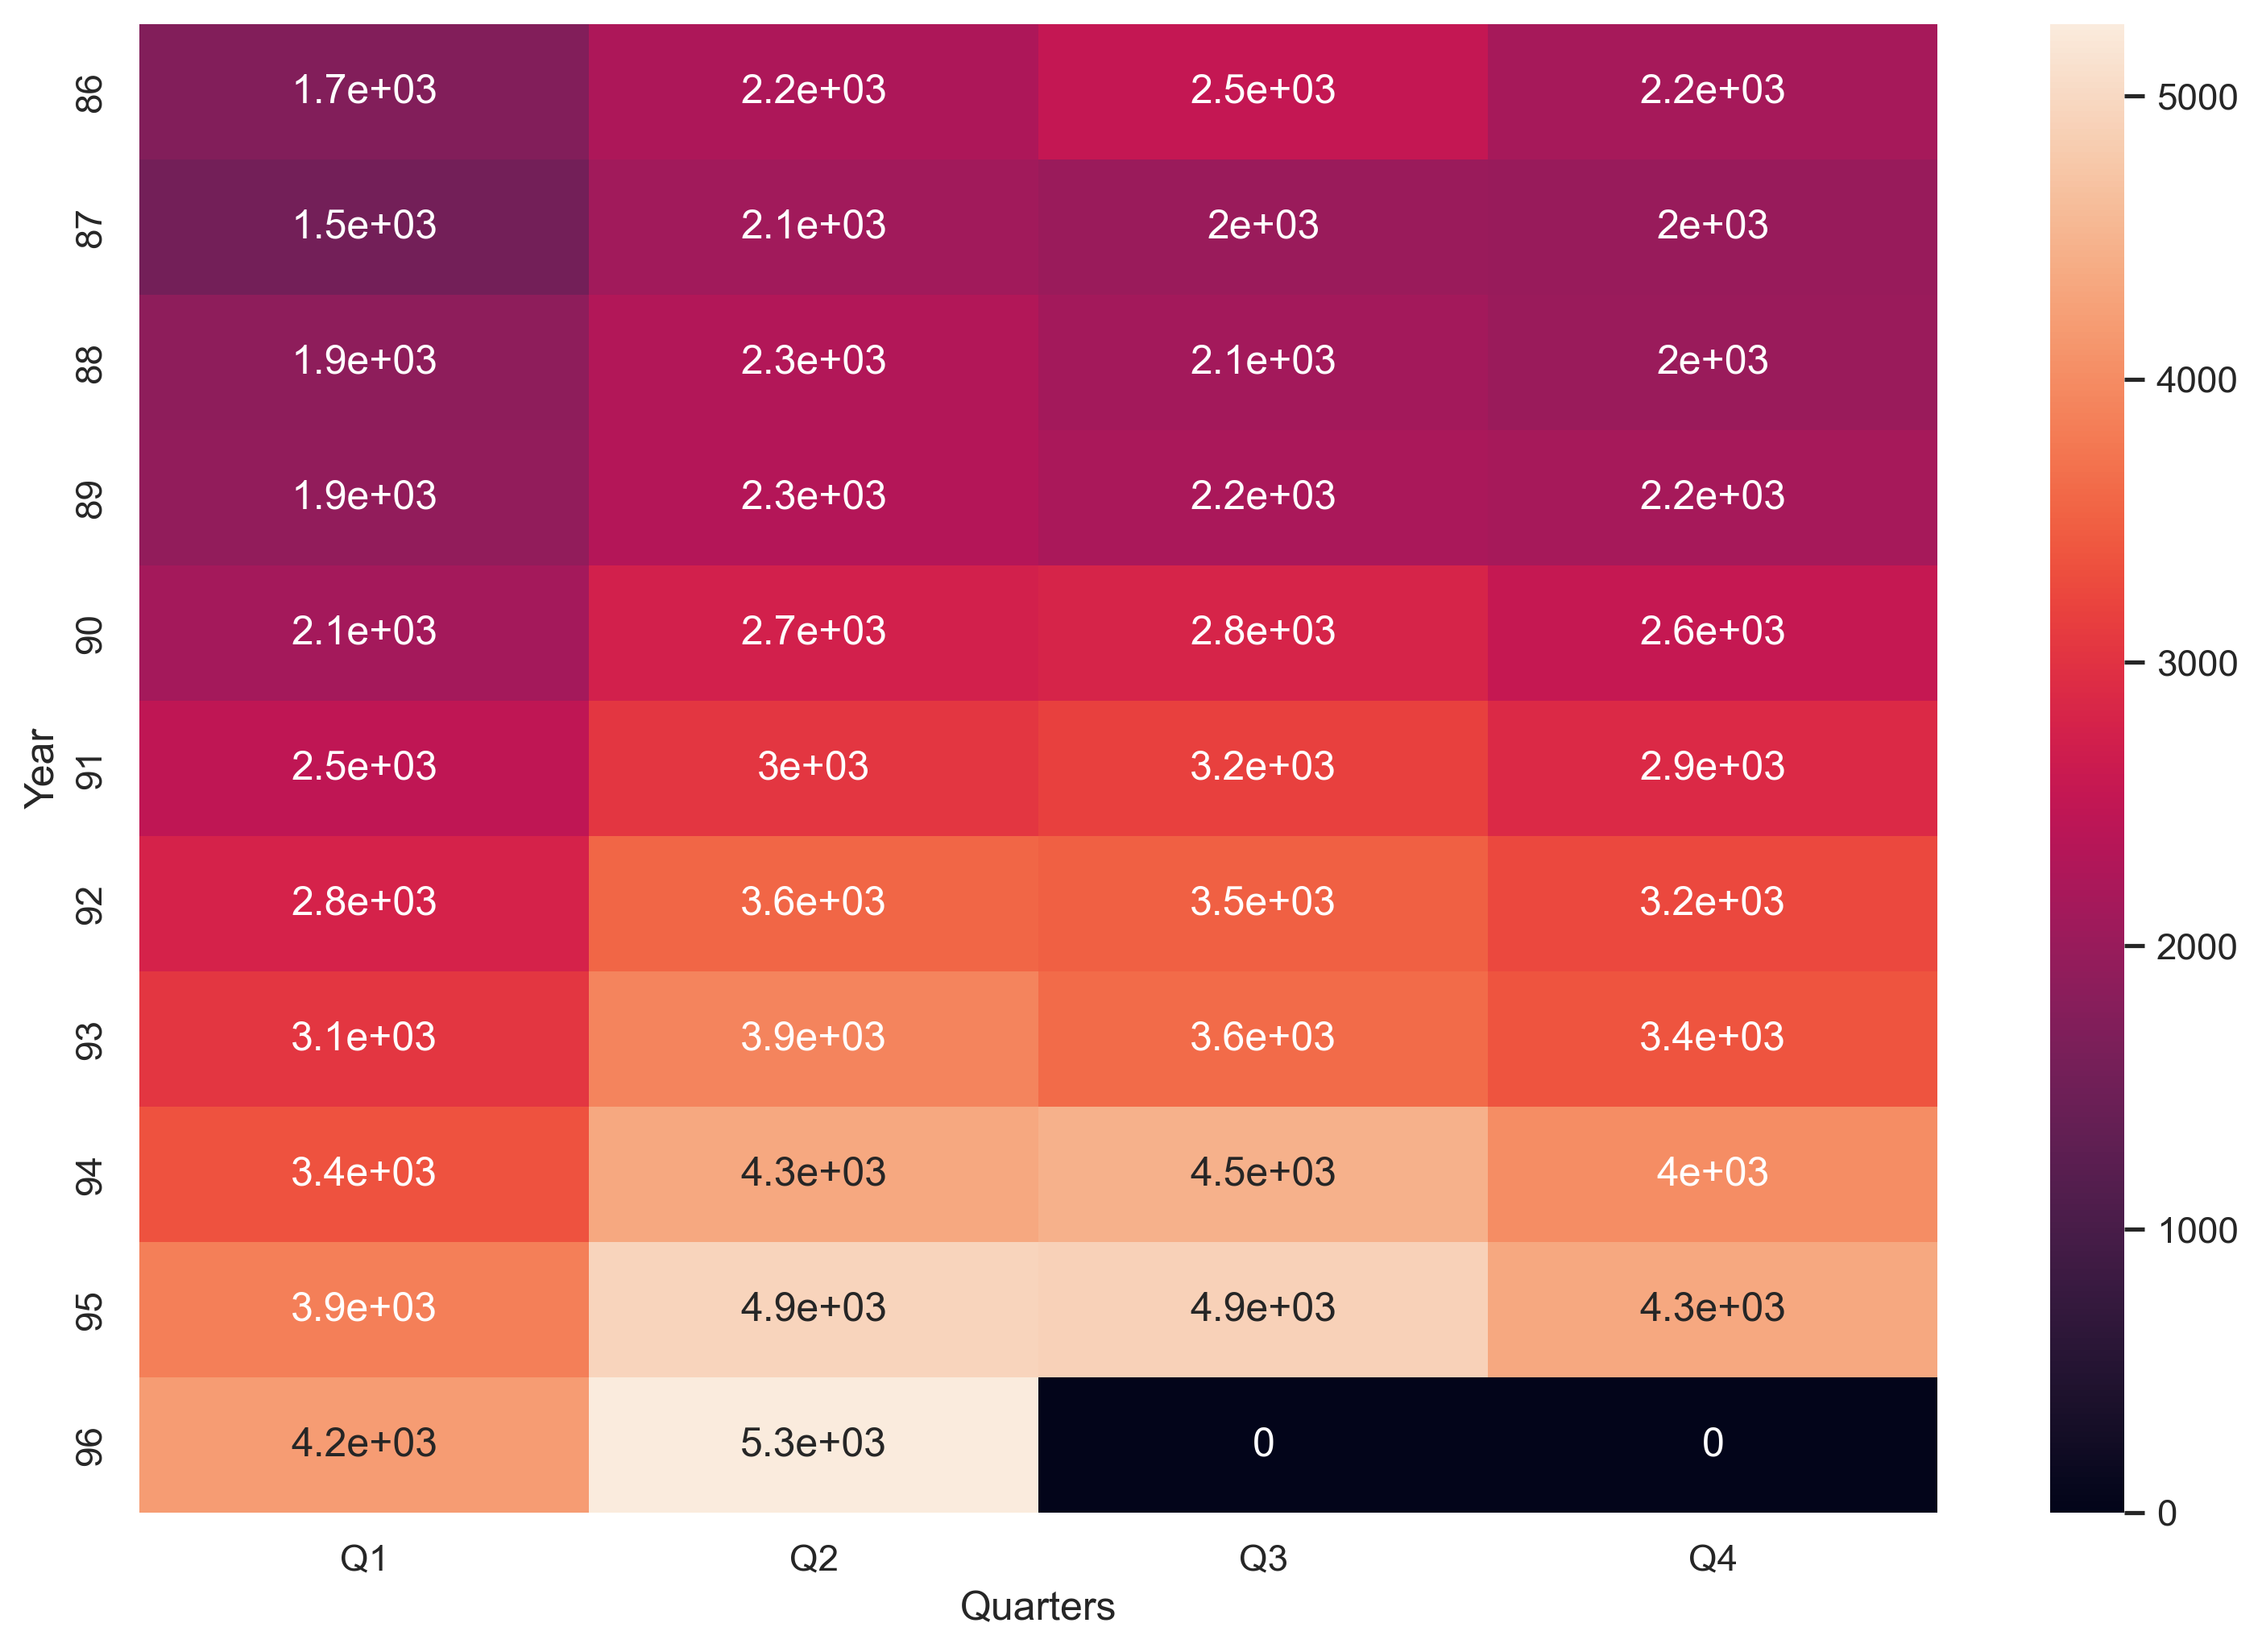

In [129]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_year = pd.pivot_table(data=coke,values="Sales",index="Year",columns="Quarters",fill_value=0)
sns.heatmap(heatmap_y_year,annot=True)

<Axes: >

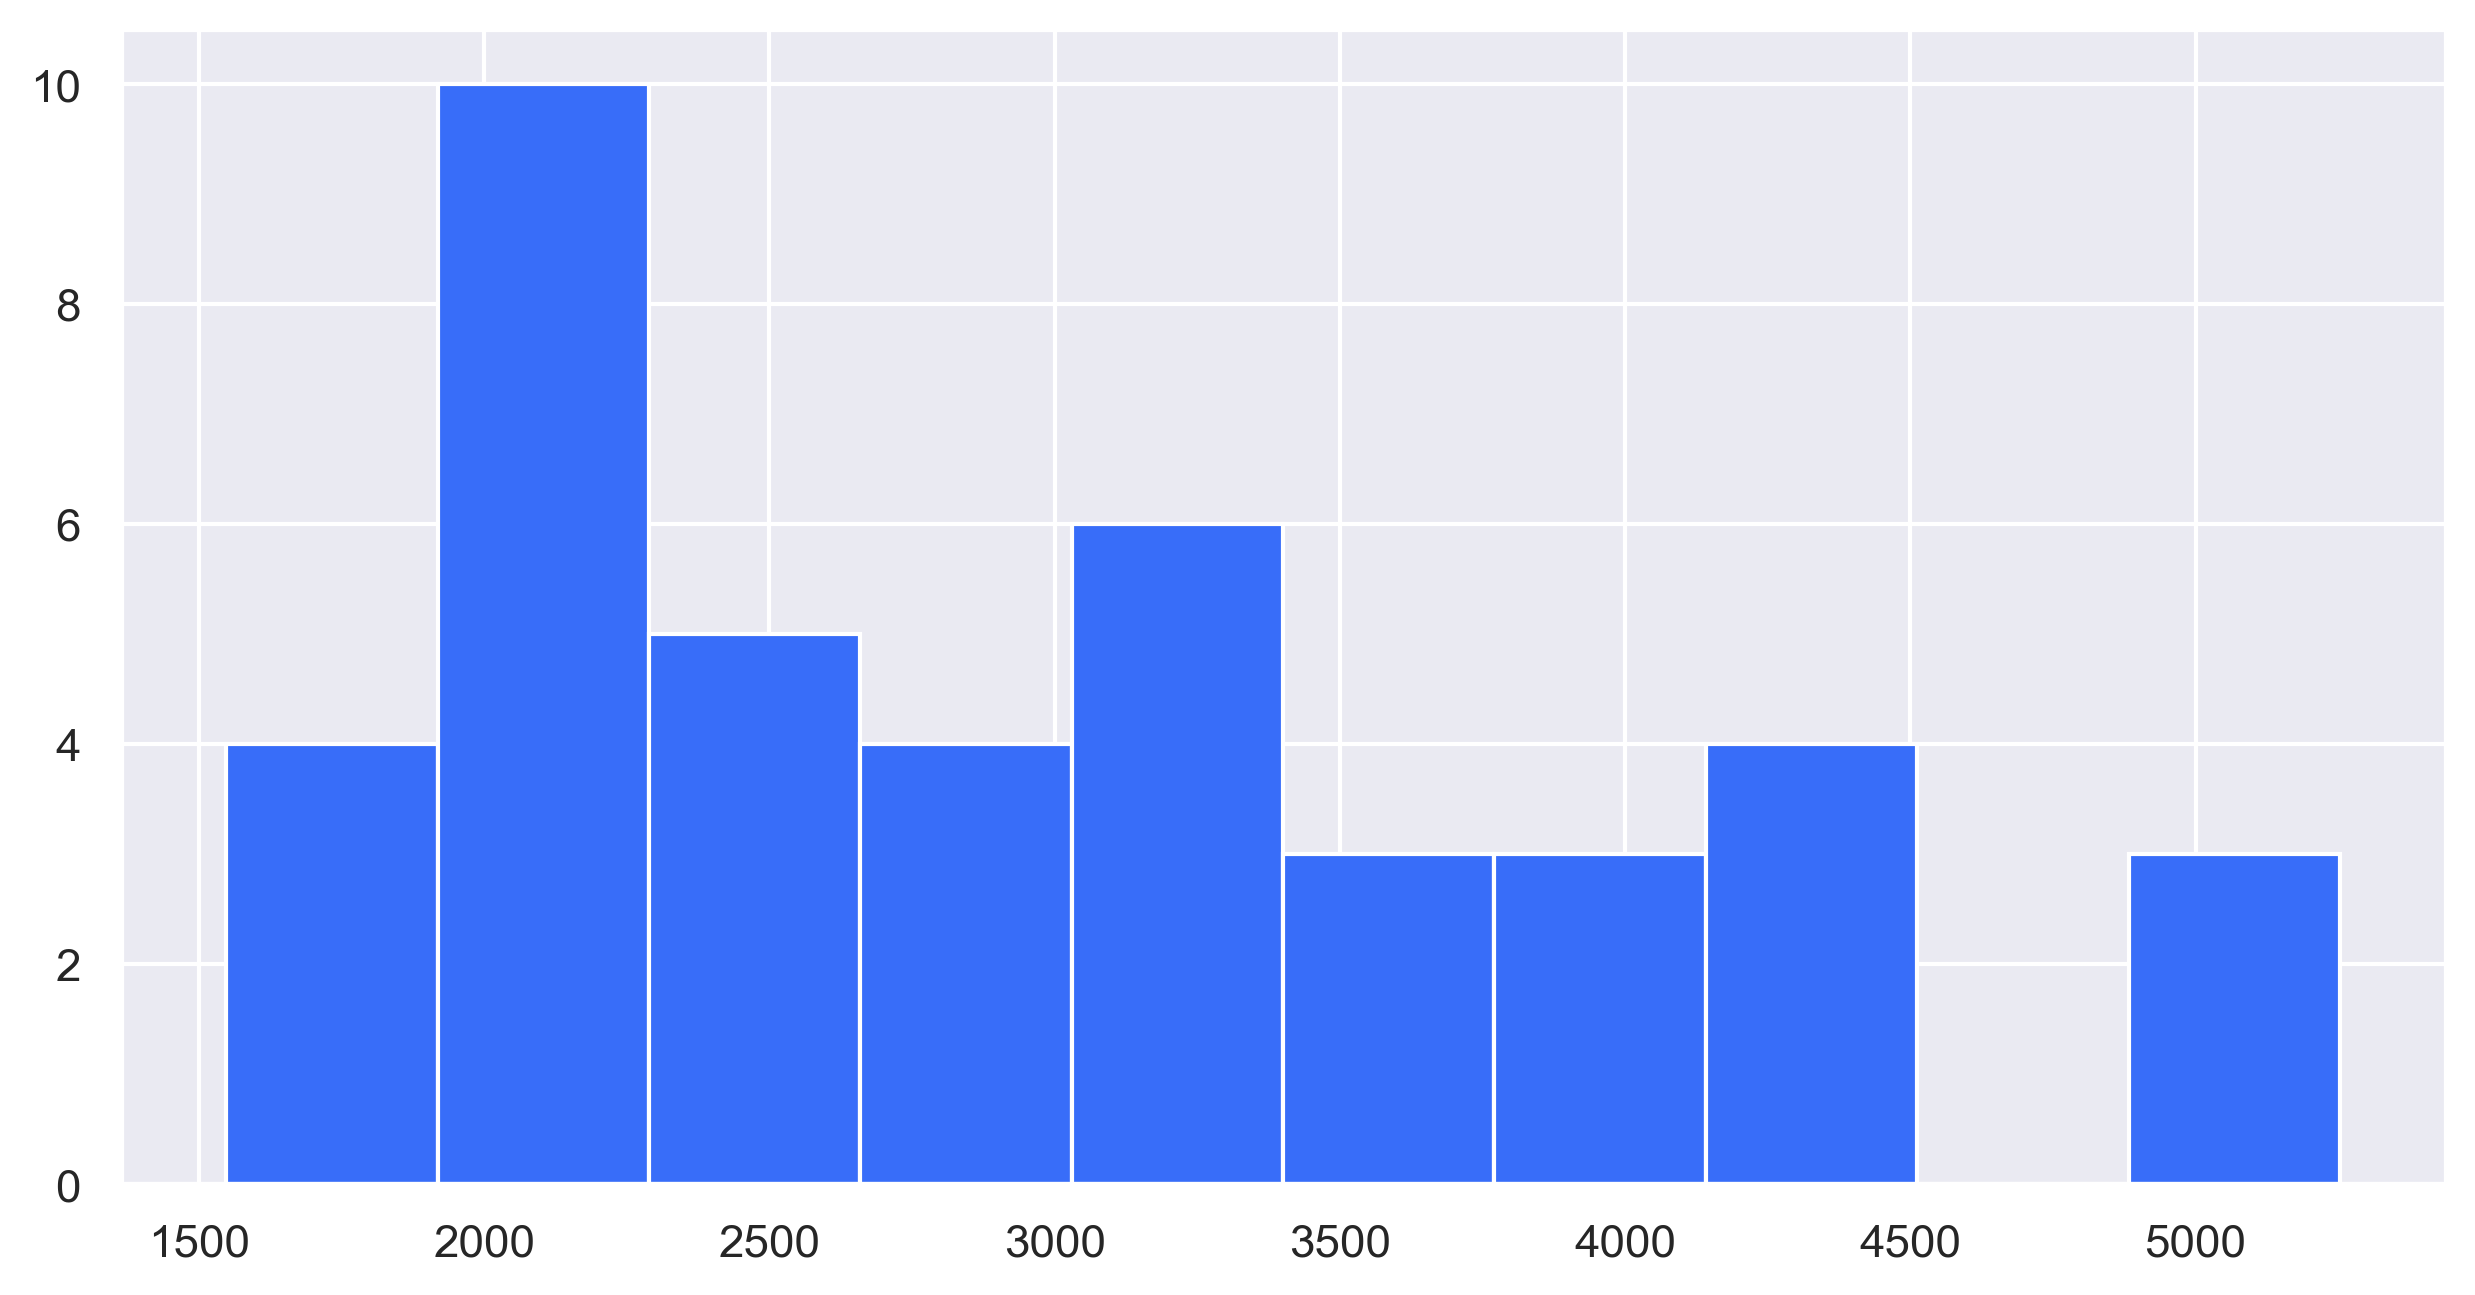

In [130]:
coke.Sales.hist()


<Axes: ylabel='Density'>

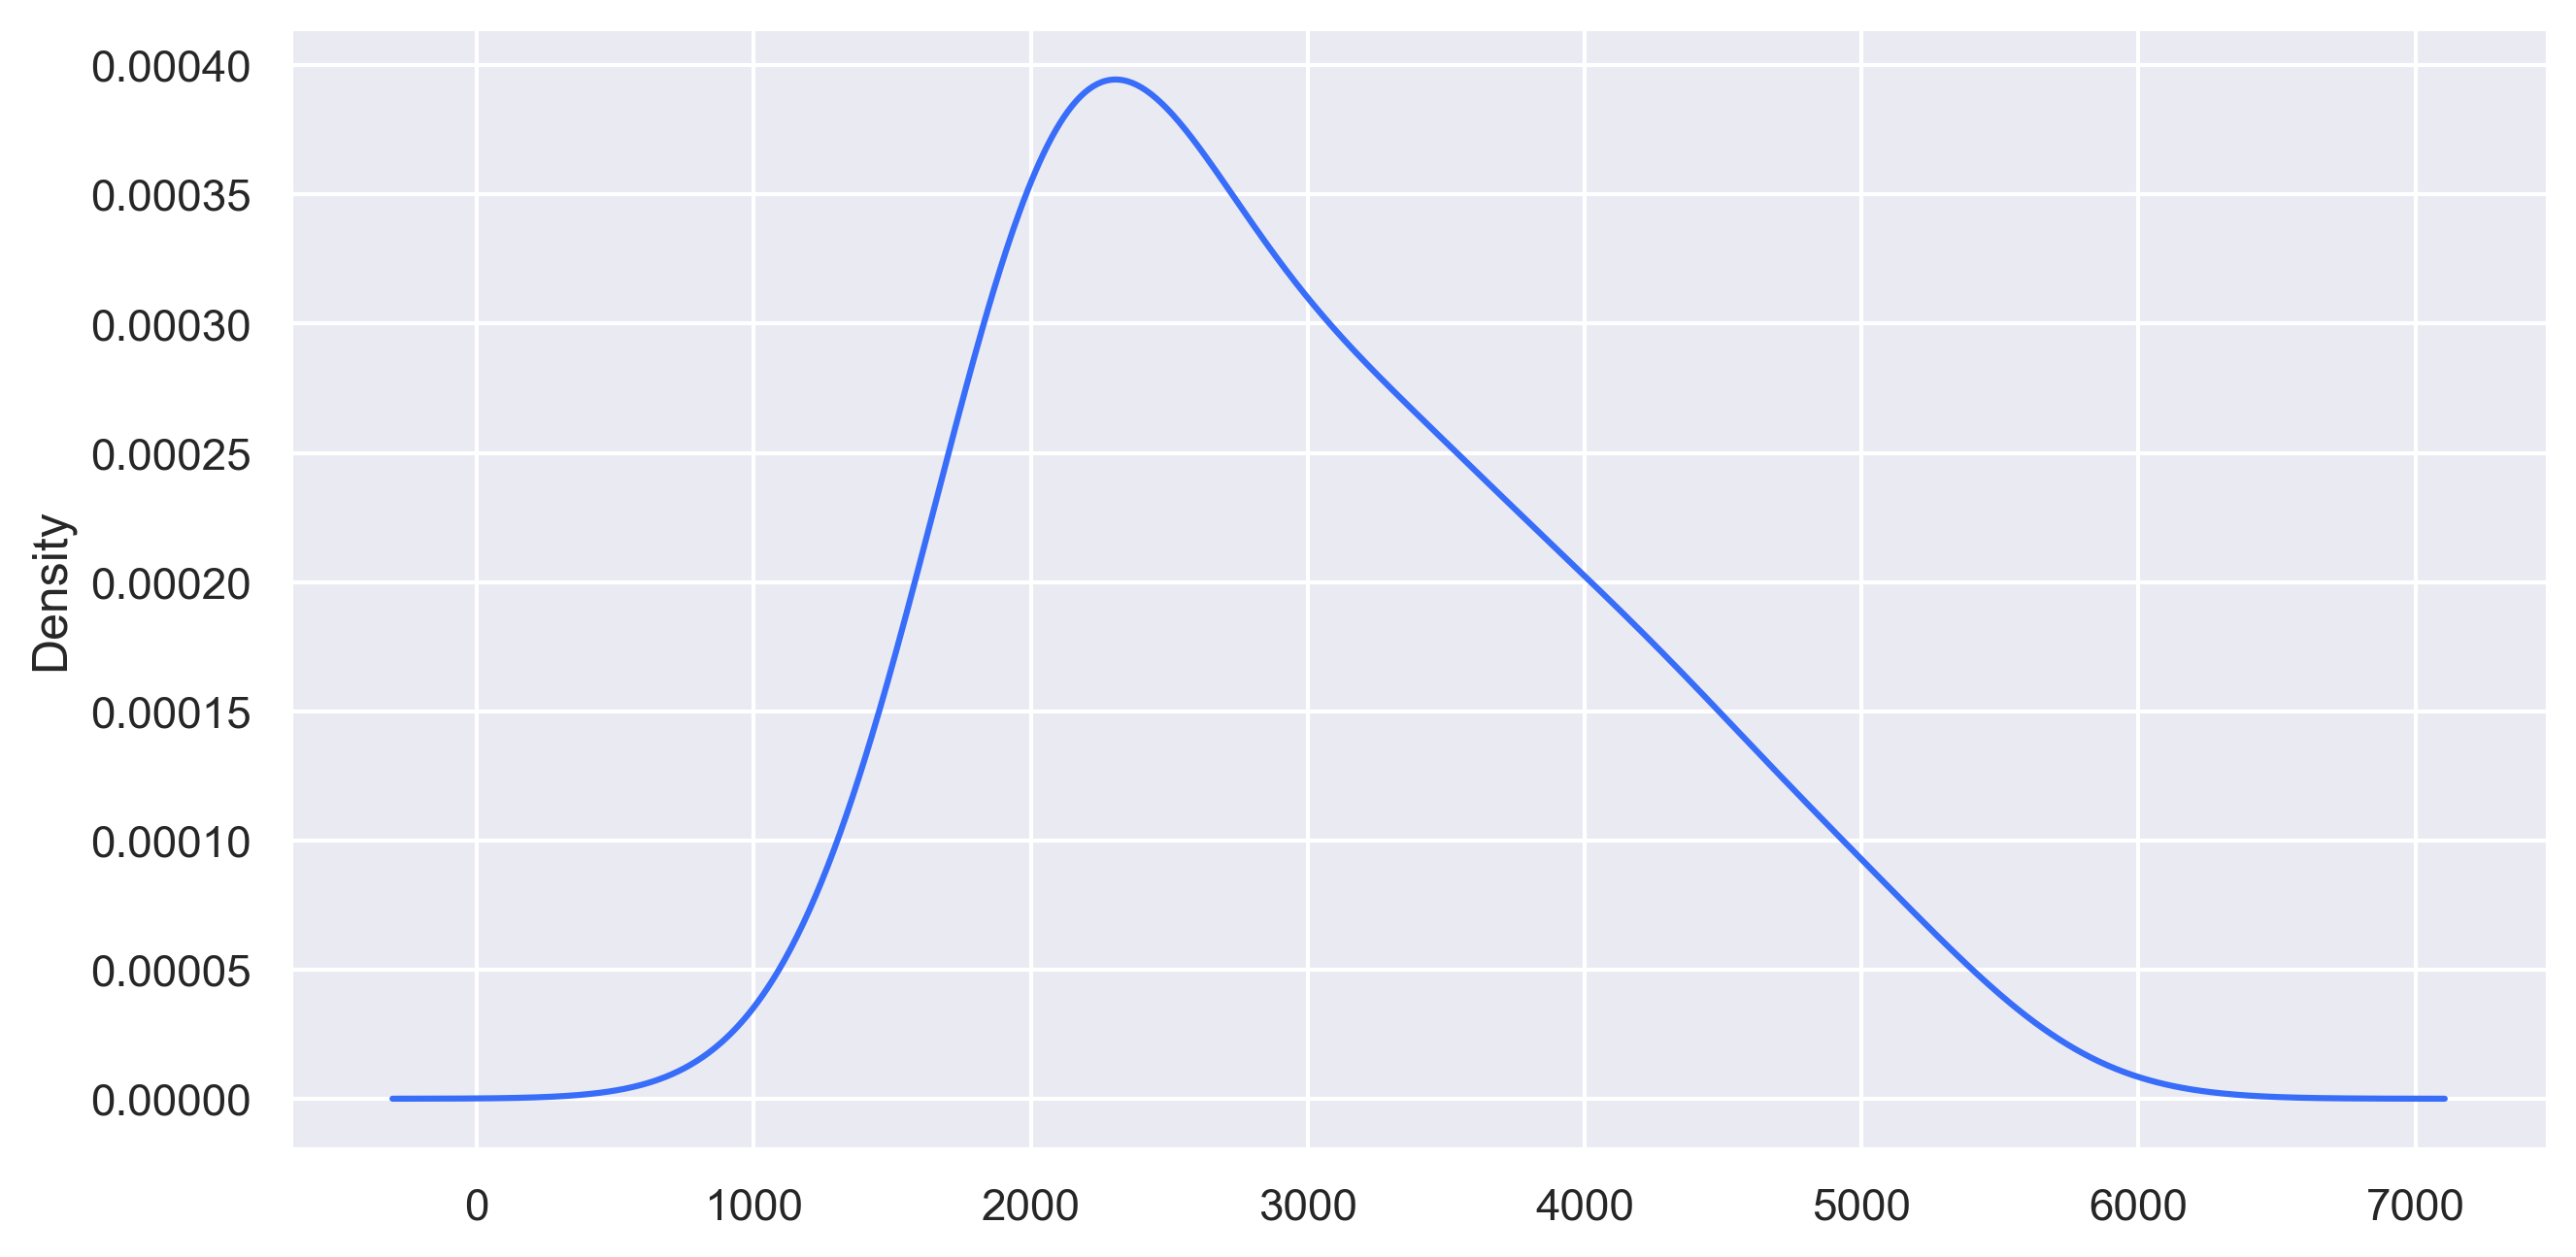

In [131]:
# Density Plot
coke.Sales.plot(kind='kde')

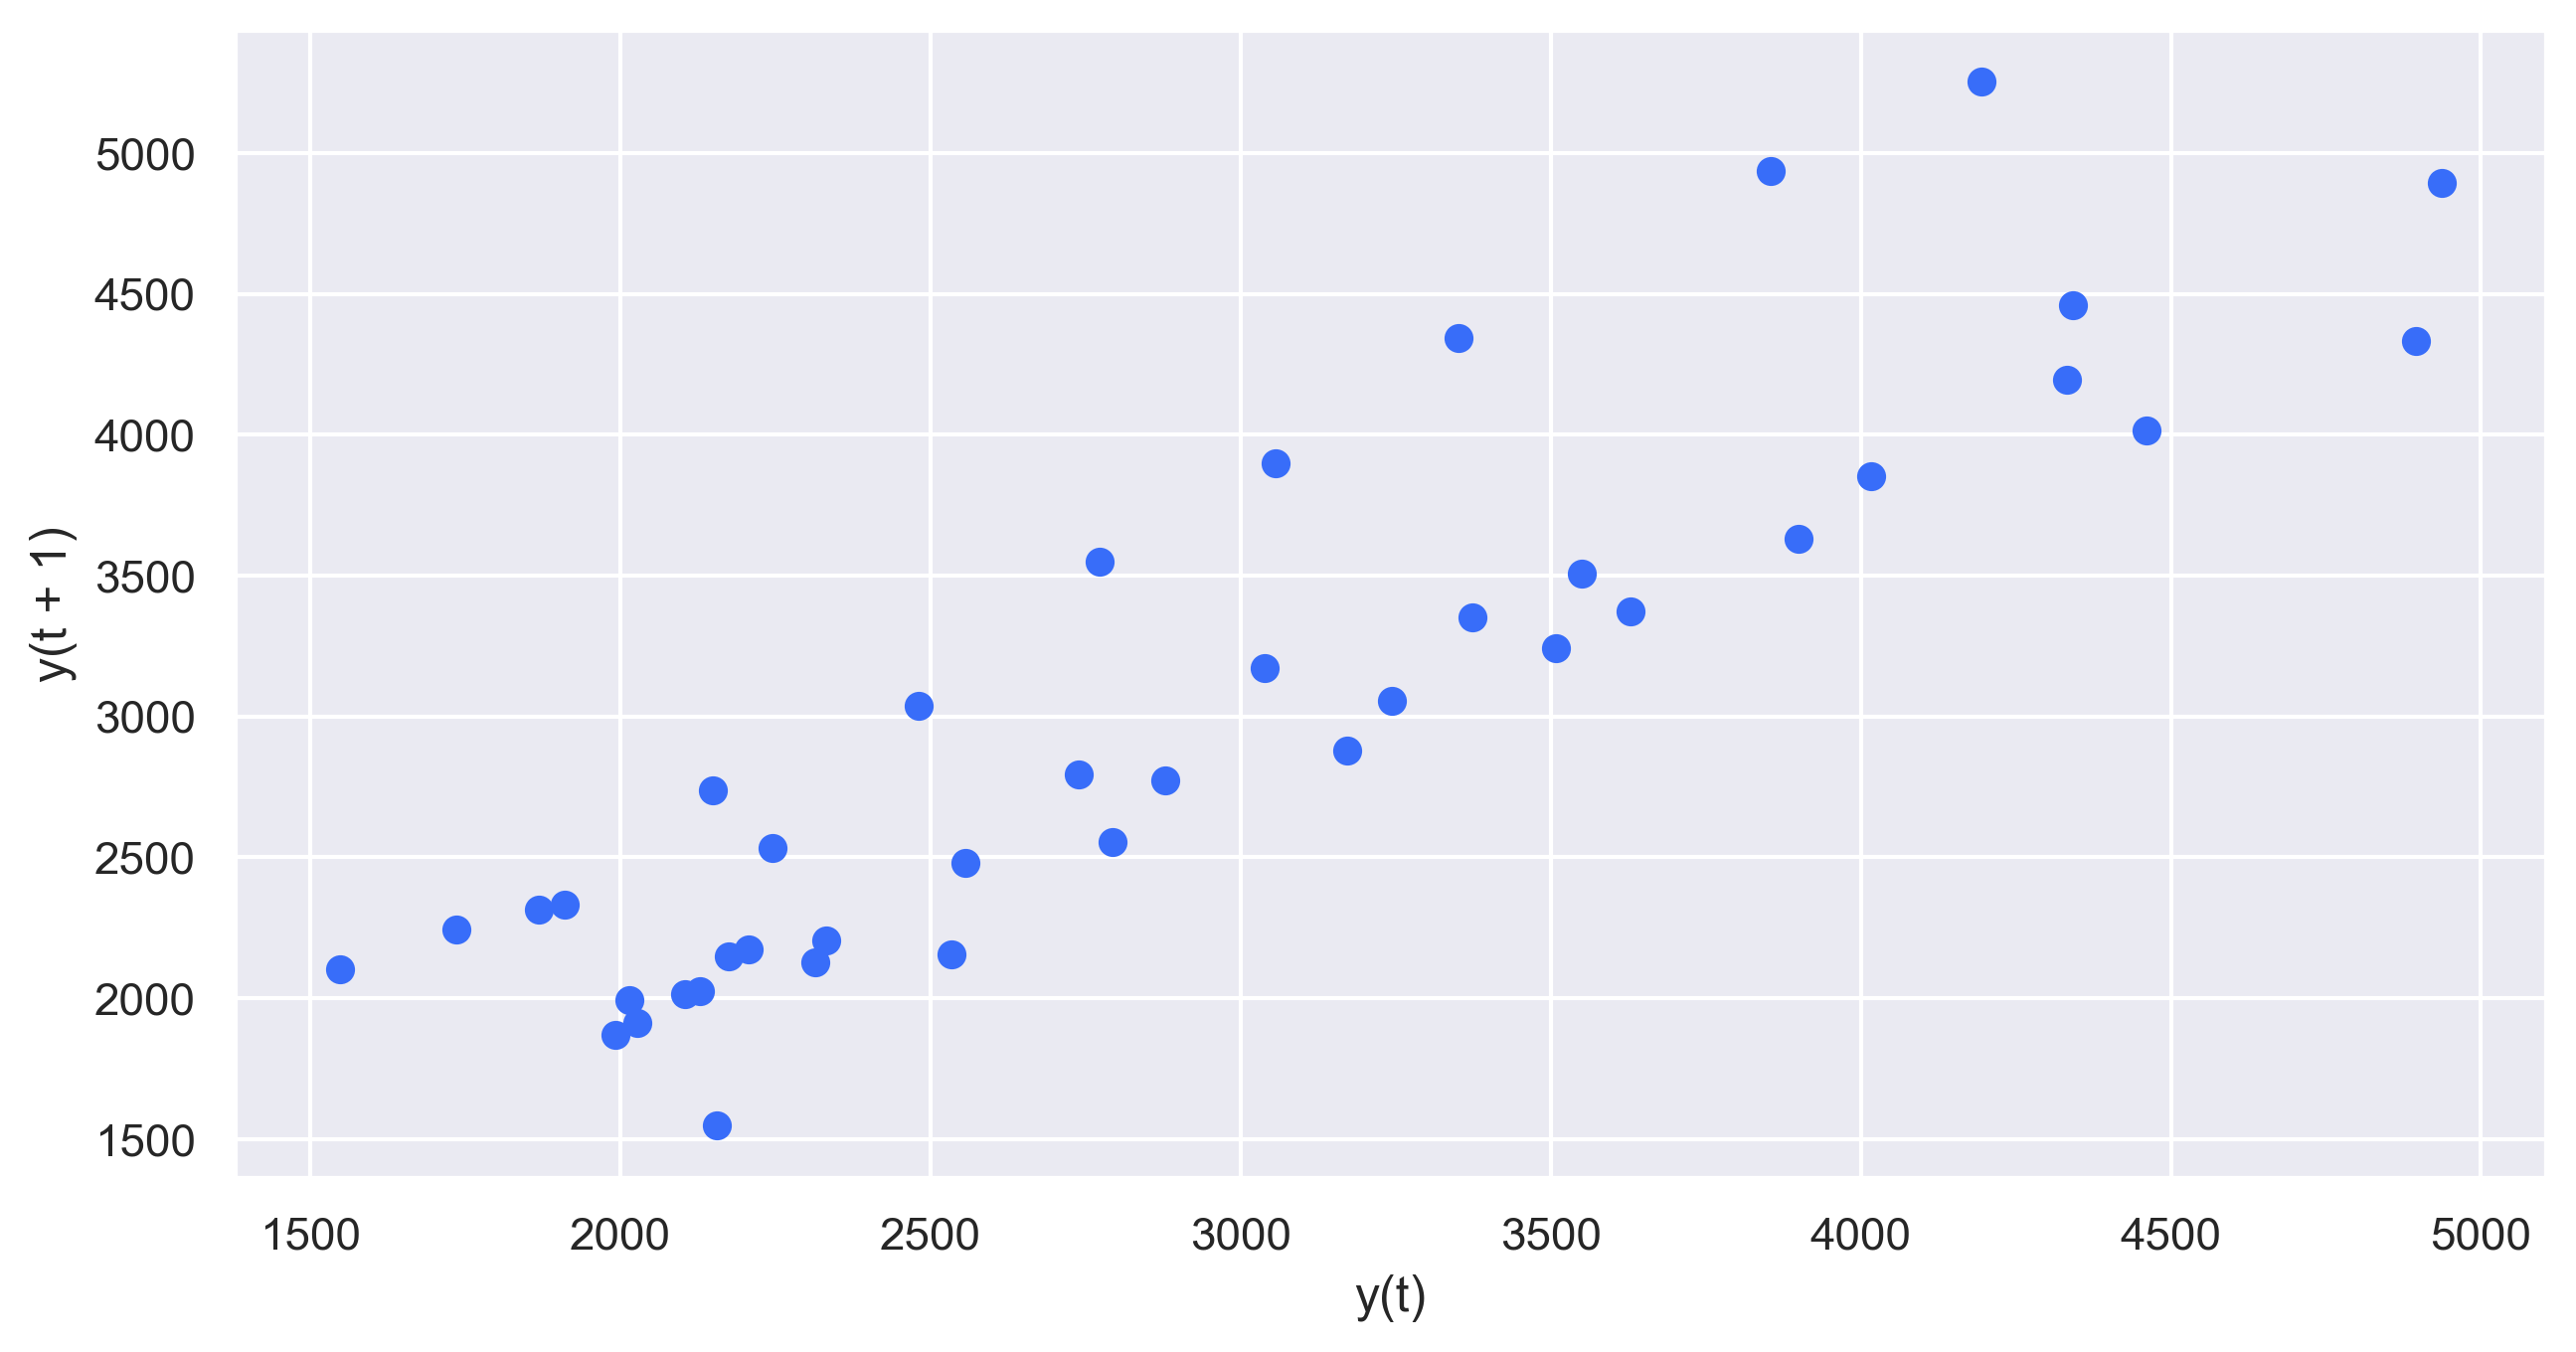

In [132]:
# Lag Plot
lag_plot(coke.Sales)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

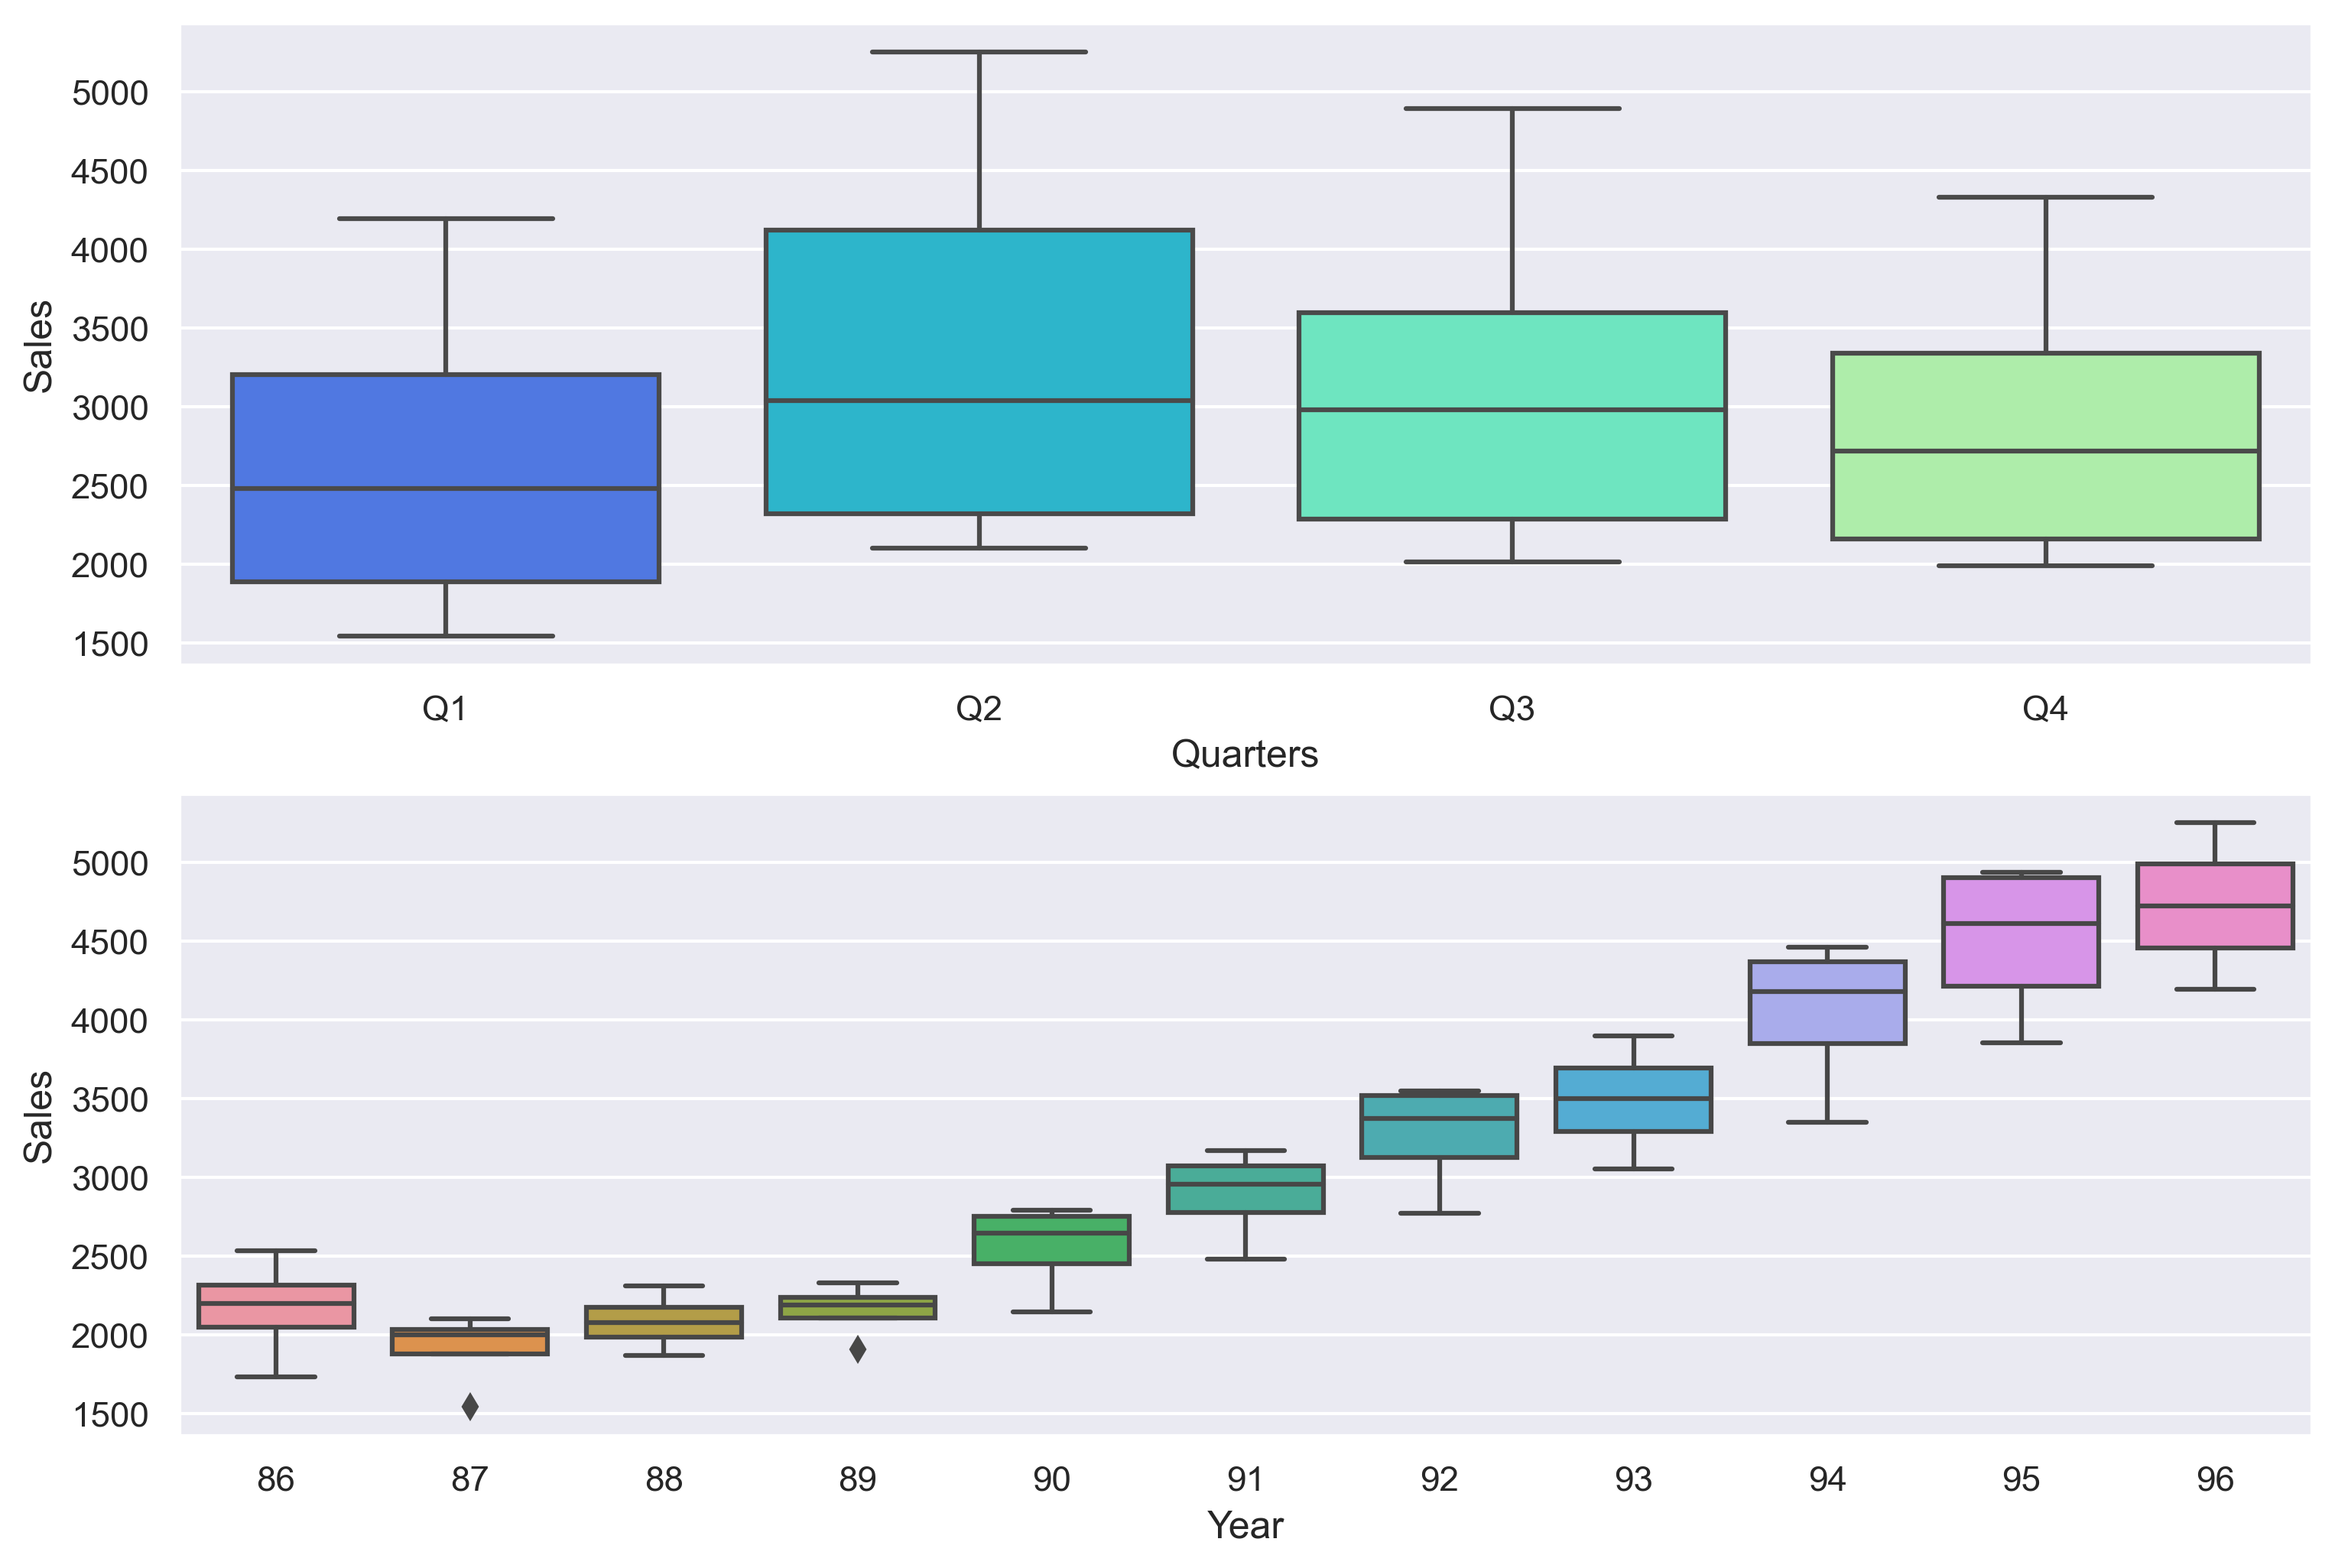

In [133]:
# Boxplot
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="Quarters",y="Sales",data=coke)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=coke)

<Axes: xlabel='Year', ylabel='Sales'>

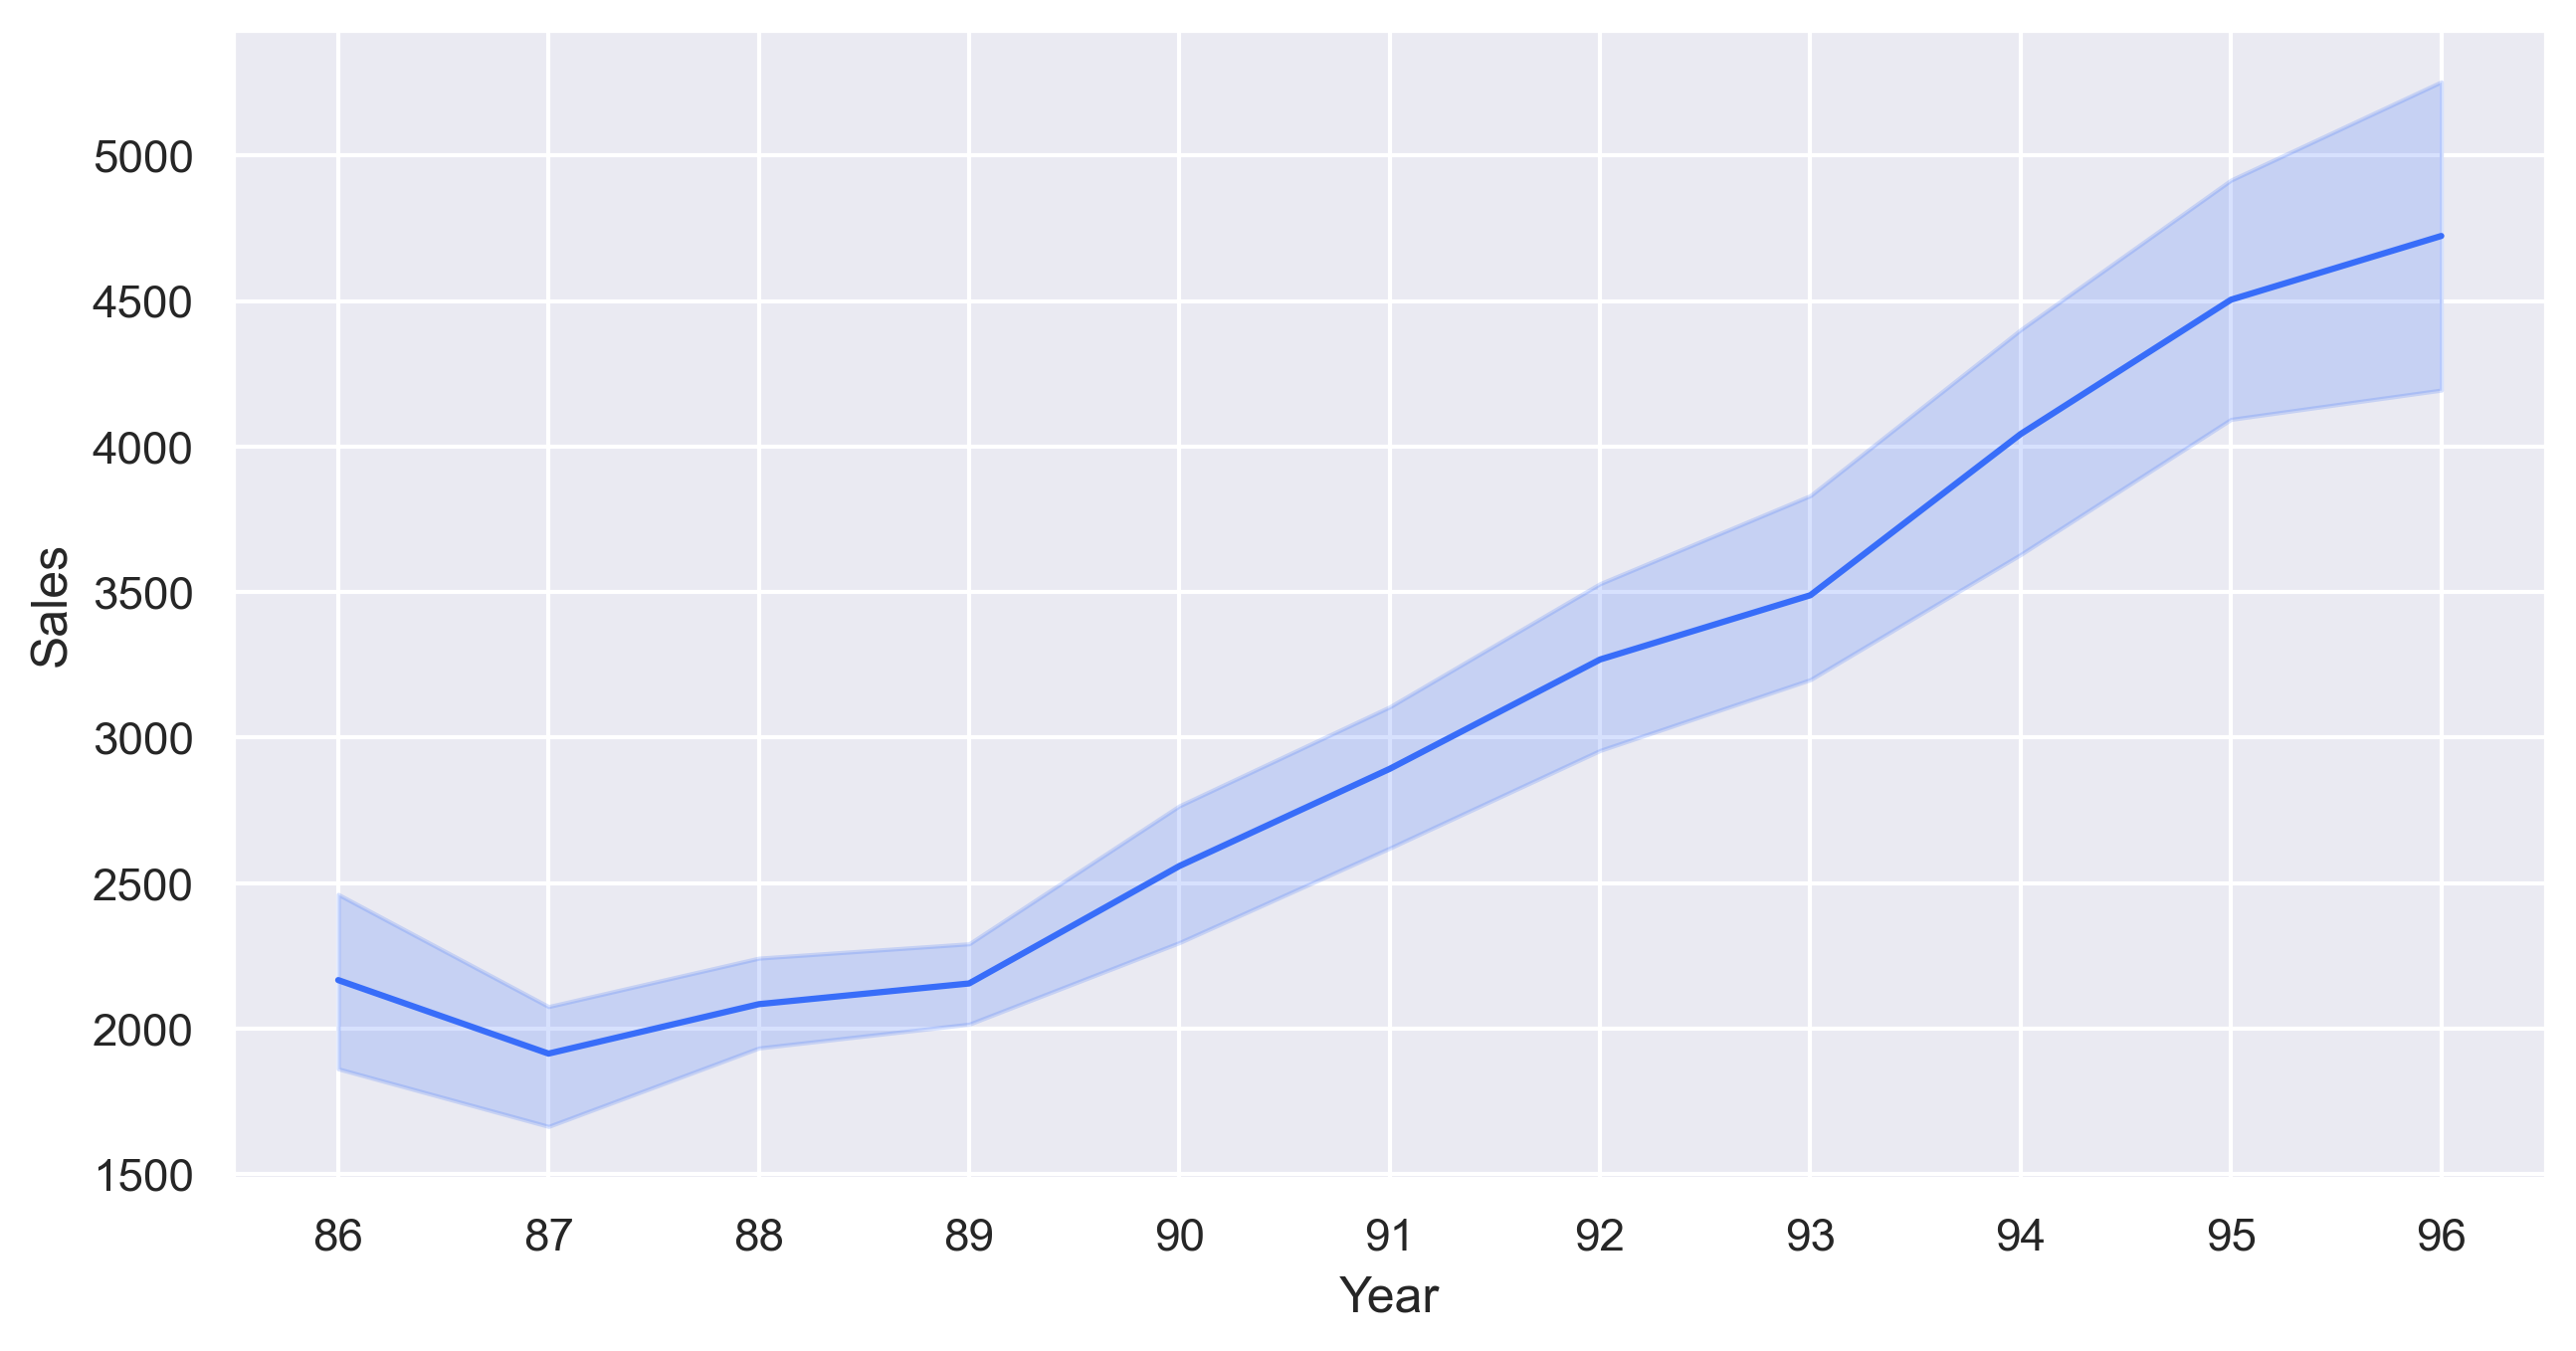

In [159]:
sns.lineplot(x="Year",y="Sales",data=coke)


# Creating t , t_square and log values


In [160]:
df['t']= np.arange(1,43)
df['t_square']= df['t']**2
df['log_Sales']=np.log(df['Sales'])

In [161]:
df.head()

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,1734.827000,1,0,0,0,1,1,7.458663
1,2244.960999,0,1,0,0,2,4,7.716443
2,2533.804993,0,0,1,0,3,9,7.837477
3,2154.962997,0,0,0,1,4,16,7.675529
4,1547.818996,1,0,0,0,5,25,7.344602


# Splitting Data


In [162]:
train= df.head(38)
test=df.head(4)

In [163]:
train.head()

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,1734.827000,1,0,0,0,1,1,7.458663
1,2244.960999,0,1,0,0,2,4,7.716443
2,2533.804993,0,0,1,0,3,9,7.837477
3,2154.962997,0,0,0,1,4,16,7.675529
4,1547.818996,1,0,0,0,5,25,7.344602


In [164]:
test

,Sales,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,1734.827000,1,0,0,0,1,1,7.458663
1,2244.960999,0,1,0,0,2,4,7.716443
2,2533.804993,0,0,1,0,3,9,7.837477
3,2154.962997,0,0,0,1,4,16,7.675529


In [165]:
import statsmodels.formula.api as smf

# Model Creation 

# Linear model


In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
mod_t= smf.ols("Sales~t", data=train).fit()
pred_t= pd.Series(mod_t.predict(pd.DataFrame(test['t'])))
rmse_t= np.sqrt(mean_squared_error(test["Sales"], pred_t))
rmse_t

563.5423290263167

# Exponential Model


In [168]:
mod_log_t= smf.ols("log_Sales~t", data=train).fit()
pred_log_t= pd.Series(mod_log_t.predict(pd.DataFrame(test['t'])))
rmse_log_t= np.sqrt(mean_squared_error(test['Sales'], pred_log_t))
rmse_log_t

2178.513826764085

# Quadratic Model


In [169]:
mod_qd= smf.ols("Sales~t+t_square", data=train).fit()
pred_mod_qd= pd.Series(mod_qd.predict(pd.DataFrame(test[["t", "t_square"]])))
rmse_mod_qd= np.sqrt(mean_squared_error(test["Sales"], pred_mod_qd))
rmse_mod_qd

331.3438941386122

# Additive Seasonality Model


In [145]:
Mod_AS= smf.ols("Sales~Q1+Q2+Q3+Q4", data=train).fit()
pred_AS= pd.Series(Mod_AS.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_AS= np.sqrt(mean_squared_error(test['Sales'], pred_AS))
rmse_AS

677.9365095145297

# Additive Seasonality Quadratic Trend


In [146]:
Mod_ASQ= smf.ols("Sales~t+t_square+Q1+Q2+Q3+Q4", data=train).fit()
pred_ASQ= pd.Series(Mod_ASQ.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_ASQ= np.sqrt(mean_squared_error(test['Sales'], pred_ASQ))
rmse_ASQ

213.8860169614668

# Multiplicative Seasonality Model 


In [147]:
Mod_MS= smf.ols('log_Sales~Q1+Q2+Q3+Q4', data=train).fit()
pred_MS= pd.Series(Mod_MS.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_MS= np.sqrt(mean_squared_error(test["Sales"], pred_MS))
rmse_MS

2178.1055464336396

# Multiplicative Seasonality with Additive trend 


In [148]:
Mod_MSA= smf.ols("log_Sales~t+Q1+Q2+Q3+Q4", data=train).fit()
pred_MSA= pd.Series(Mod_MSA.predict(test[['Q1','Q2','Q3','Q4','t']]))
rmse_MSA= np.sqrt(mean_squared_error(test["Sales"], pred_MSA))
rmse_MSA

2178.5014064091683

# Smoothing Techniques


In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Decomposition plot


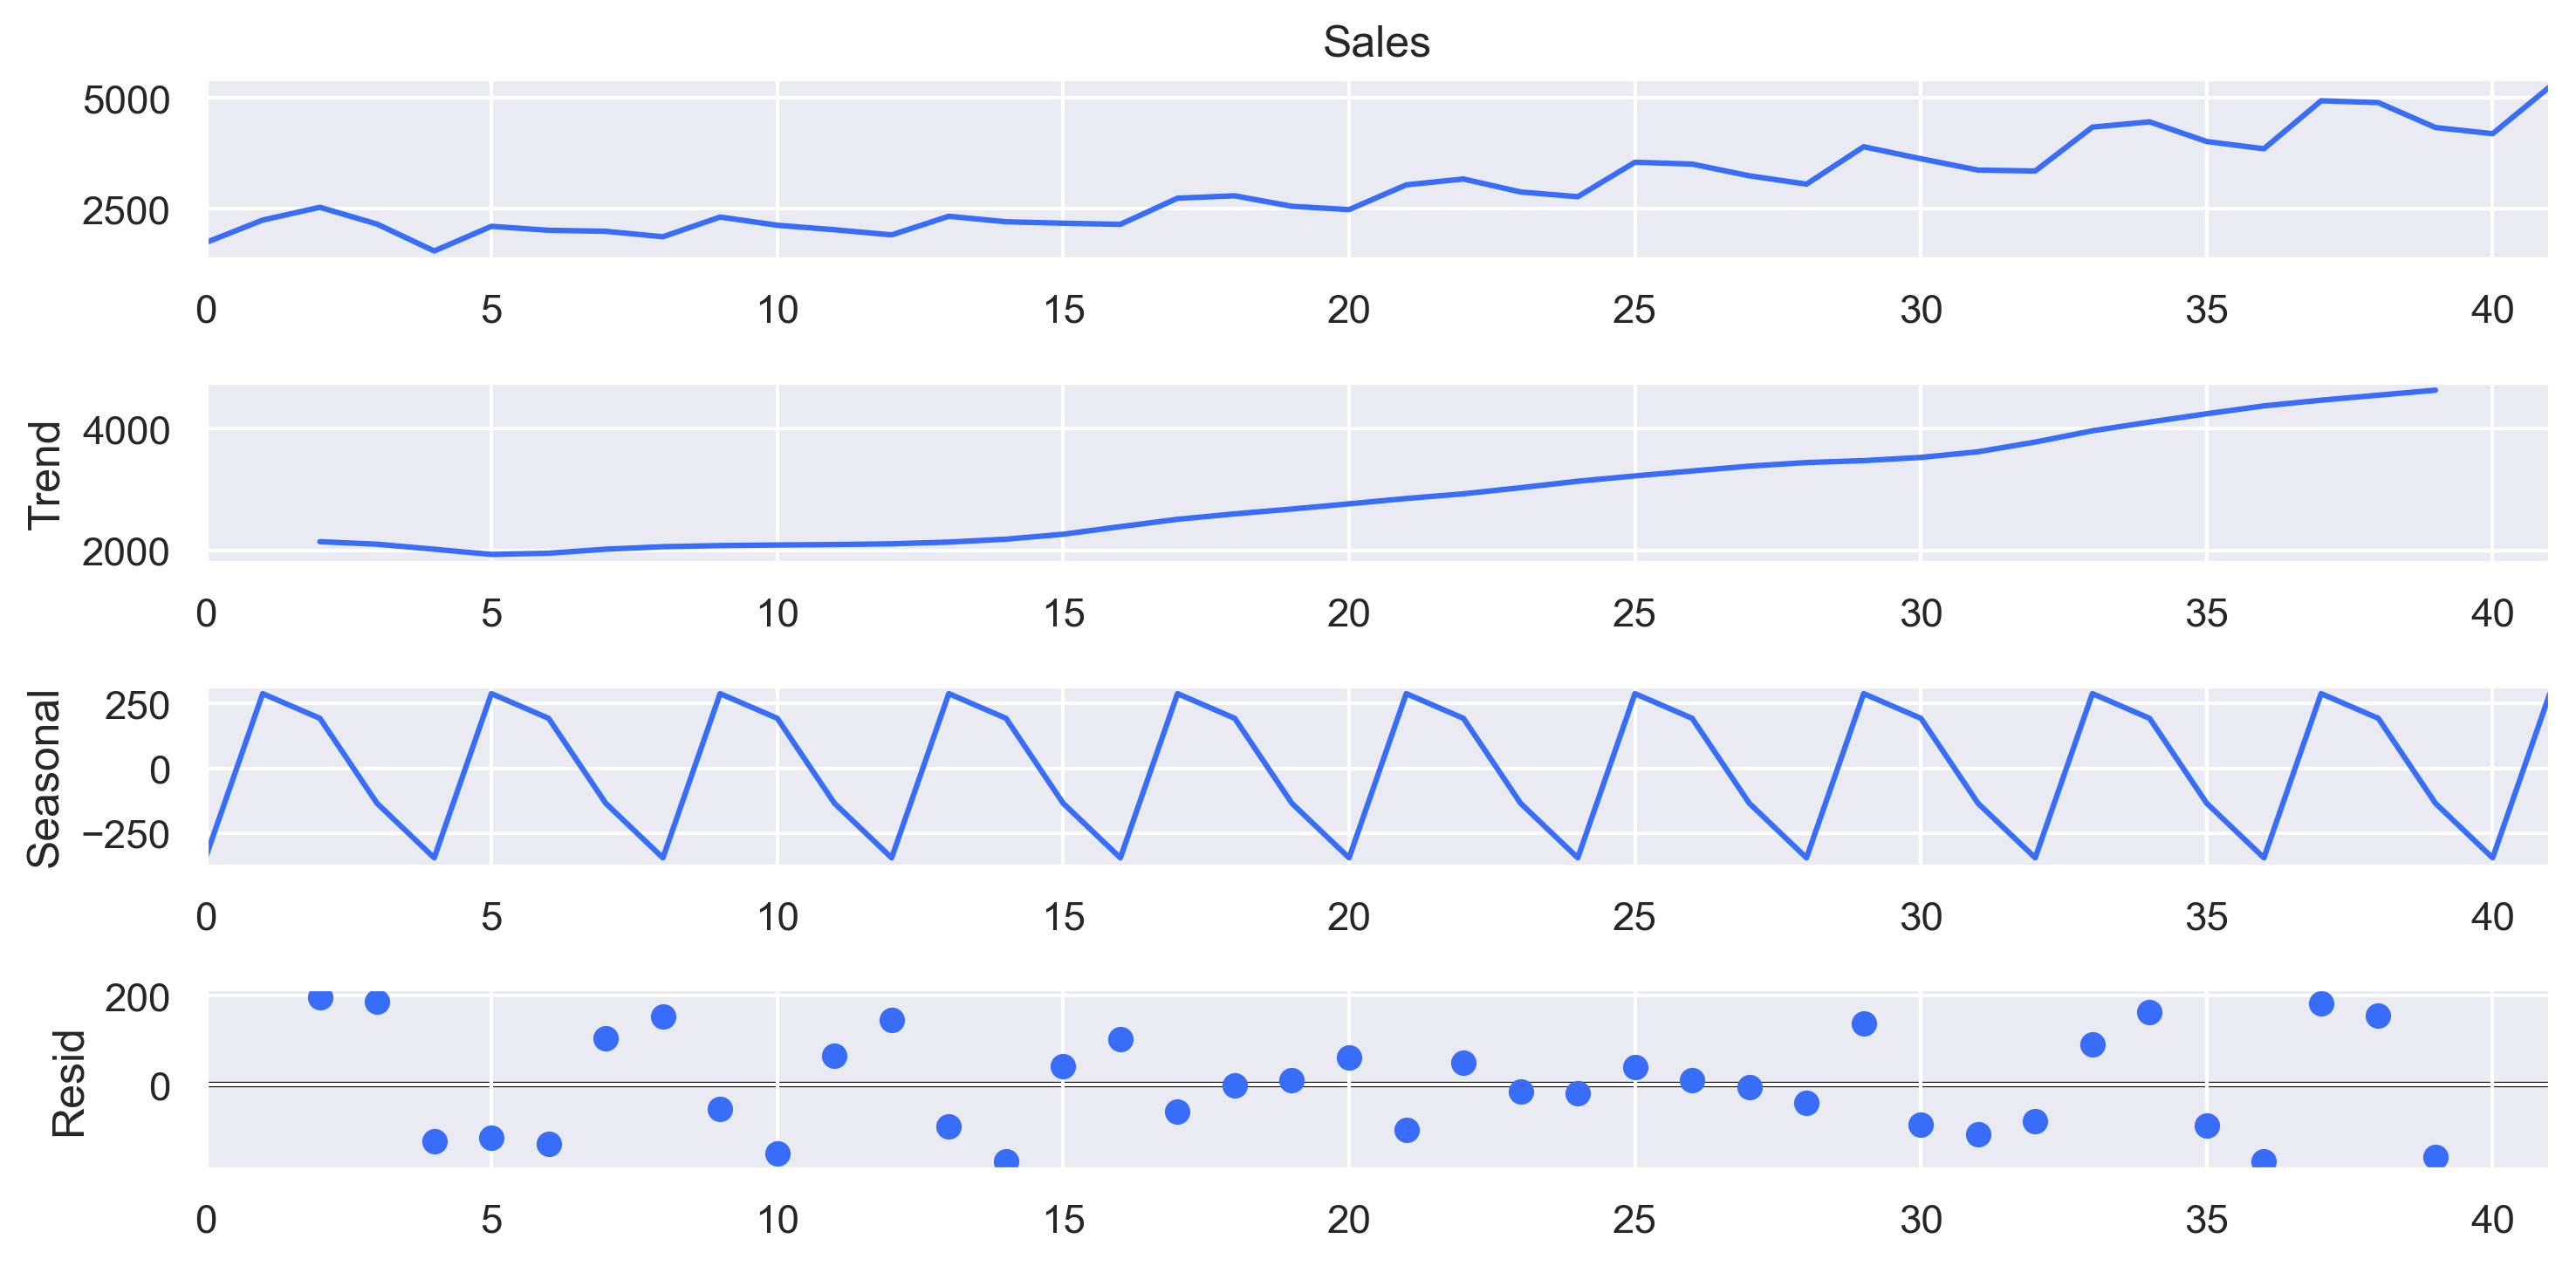

In [150]:
dec=seasonal_decompose(df.Sales,period=4)
dec.plot()
plt.show()

# Simple Exponential Method


In [151]:
Mod_SE=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_SE=Mod_SE.predict(start=test.index[0],end=test.index[-1])
rmse_SE = np.sqrt(mean_squared_error(test['Sales'], pred_SE))
rmse_SE

317.1172076998188

# Holt method 


In [152]:
Mod_hm= Holt(train['Sales']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hm = Mod_hm.predict(start = test.index[0],end = test.index[-1])
rmse_hm = np.sqrt(mean_squared_error(test['Sales'], pred_hm))
rmse_hm

358.9361374966237

# Holts winter exponential smoothing with additive seasonality and additive trend


In [153]:
Mod_hesa = ExponentialSmoothing(train['Sales'],seasonal="add",trend="add",seasonal_periods=4).fit() 
pred_hesa = Mod_hesa.predict(start = test.index[0],end = test.index[-1])
rmse_hesa = np.sqrt(mean_squared_error(test["Sales"], pred_hesa))
rmse_hesa

118.18038260118938

# Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [154]:
Mod_heam = ExponentialSmoothing(train['Sales'],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_heam = Mod_heam.predict(start = test.index[0],end = test.index[-1])
rmse_heam = np.sqrt(mean_squared_error(test['Sales'], pred_heam))
rmse_heam

161.5391592340625

# Compare The Results


In [155]:
st = {"MODEL":pd.Series(['Linear','exponential','Quadratic','Additive','Additive & Quad','Multiplicative','Multiplicative & Quad','Simple Exponential','Holt','Holt Winter add','Holt Winter Mul']),
      "RMSE_Values":pd.Series([rmse_t, rmse_log_t, rmse_mod_qd, rmse_AS, rmse_ASQ, rmse_MS, rmse_MSA, rmse_SE, rmse_hm, rmse_hesa, rmse_heam])}
table_rmse=pd.DataFrame(st)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
9,Holt Winter add,118.180383
10,Holt Winter Mul,161.539159
4,Additive & Quad,213.886017
7,Simple Exponential,317.117208
2,Quadratic,331.343894
8,Holt,358.936137
0,Linear,563.542329
3,Additive,677.936510
5,Multiplicative,2178.105546
6,Multiplicative & Quad,2178.501406


''' From above table we select Holt Winter Additive Seasonality because of Seasonality is additive from dec plot.'''

# Create Final Model


In [156]:
Mod_final =ExponentialSmoothing(df['Sales'],seasonal="add",trend="add",seasonal_periods=4).fit()

In [157]:
Mod_final.forecast(8)

42    5153.924224
43    4693.659844
44    4612.987436
45    5629.715970
46    5536.407253
47    5076.142873
48    4995.470465
49    6012.198999
dtype: float64